# Air Quality Index Prediction


## Final Presentation Notebook

## CSE445 Project Group 3




### Fuwad Hasan(2211247042)
### Mohammed Arif Mainuddin(2211577042)
### Najifa Tabassum(2211578042)
### Riazul Zannat(2211199042)



## Loading and Reading the dataset

In [1]:
import pandas as pd
df = pd.read_csv("Air_Quality_Monitoring_Data_20250216.csv")

In [2]:
df.head()

,Name,GPS,DateTime,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,...,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_O3_8hr,AQI_PM10,AQI_PM2.5,AQI_Site,Date,Time
0,Monash,"(-35.418302, 149.094018)",31/12/2024 04:00:00 PM,NaN,NaN,NaN,0.030,NaN,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,27.0,21.0,NaN,31 December 2024,16:00
1,Monash,"(-35.418302, 149.094018)",30/12/2024 04:00:00 PM,NaN,NaN,NaN,0.034,NaN,6.0,5.0,...,NaN,NaN,NaN,NaN,NaN,21.0,20.0,NaN,30 December 2024,16:00
2,Monash,"(-35.418302, 149.094018)",26/12/2024 04:00:00 PM,NaN,NaN,NaN,0.041,NaN,10.0,6.0,...,NaN,NaN,NaN,NaN,NaN,24.0,18.0,NaN,26 December 2024,16:00
3,Florey,"(-35.220606, 149.043539)",05/12/2024 12:00:00 PM,NaN,NaN,NaN,0.017,NaN,9.0,9.0,...,NaN,NaN,NaN,NaN,NaN,22.0,31.0,31.0,05 December 2024,12:00
4,Florey,"(-35.220606, 149.0435)",27/10/2024 07:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,26 October 2024,07:00


In [3]:
df.shape

(343940, 22)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343940 entries, 0 to 343939
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Name        343940 non-null  object 
 1   GPS         343940 non-null  object 
 2   DateTime    343940 non-null  object 
 3   NO2         232379 non-null  float64
 4   O3_1hr      325607 non-null  float64
 5   O3_4hr      339406 non-null  float64
 6   O3_8hr      334393 non-null  float64
 7   CO          241477 non-null  float64
 8   PM10 1 hr   308341 non-null  float64
 9   PM2.5 1 hr  255375 non-null  float64
 10  PM10        305362 non-null  float64
 11  PM2.5       253061 non-null  float64
 12  AQI_CO      241443 non-null  float64
 13  AQI_NO2     234084 non-null  float64
 14  AQI_O3_1hr  325509 non-null  float64
 15  AQI_O3_4hr  339369 non-null  float64
 16  AQI_O3_8hr  169402 non-null  float64
 17  AQI_PM10    305383 non-null  float64
 18  AQI_PM2.5   252818 non-null  float64
 19  AQ

In [5]:
df.describe()

,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_O3_8hr,AQI_PM10,AQI_PM2.5,AQI_Site
count,232379.00000,325607.000000,339406.000000,334393.000000,241477.000000,308341.000000,255375.000000,305362.000000,253061.000000,241443.000000,234084.000000,325509.000000,339369.000000,169402.000000,305383.000000,252818.000000,343818.000000
mean,0.00456,0.016962,0.017222,0.017099,0.224734,12.341043,8.181865,12.296600,8.173589,2.488297,4.501209,16.840084,21.461521,27.798946,24.484624,32.519385,37.807509
std,0.00673,0.016972,0.010527,0.009591,0.339305,32.338512,31.730424,25.855101,25.574331,3.781989,5.415663,11.059350,13.165352,14.698916,51.706449,102.338525,88.142994
min,-0.00100,-0.001000,-0.001000,0.000000,-0.140000,-55.000000,-38.000000,-2.000000,-4.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-3.000000,-15.000000,0.000000
25%,0.00000,0.008000,0.009000,0.010000,0.080000,4.000000,2.000000,6.000000,3.760000,1.000000,1.000000,8.000000,11.000000,18.000000,12.000000,14.000000,23.000000
50%,0.00000,0.017000,0.018000,0.017000,0.130000,9.000000,5.000000,9.000000,5.000000,1.000000,3.000000,17.000000,22.000000,28.000000,19.000000,21.000000,30.000000
75%,0.01000,0.024000,0.024000,0.023000,0.260000,14.000000,9.000000,14.000000,8.000000,3.000000,7.000000,24.000000,30.000000,38.000000,28.000000,32.000000,39.000000
max,0.17000,1.916000,0.118000,0.107000,22.000000,2714.000000,2496.000000,1216.000000,1296.000000,244.000000,213.000000,145.000000,147.000000,164.000000,2432.000000,5185.000000,5185.000000


In [6]:
df.isnull().sum()

Name               0
GPS                0
DateTime           0
NO2           111561
O3_1hr         18333
O3_4hr          4534
O3_8hr          9547
CO            102463
PM10 1 hr      35599
PM2.5 1 hr     88565
PM10           38578
PM2.5          90879
AQI_CO        102497
AQI_NO2       109856
AQI_O3_1hr     18431
AQI_O3_4hr      4571
AQI_O3_8hr    174538
AQI_PM10       38557
AQI_PM2.5      91122
AQI_Site         122
Date               0
Time               0
dtype: int64

In [7]:
df.shape

(343940, 22)

In [8]:
df.drop_duplicates(inplace= True)
df.shape

(343920, 22)

In [9]:
df.describe()

,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_O3_8hr,AQI_PM10,AQI_PM2.5,AQI_Site
count,232367.000000,325587.000000,339386.000000,334373.000000,241459.000000,308321.000000,255355.000000,305342.000000,253041.000000,241425.000000,234066.000000,325489.000000,339349.000000,169382.000000,305363.000000,252798.000000,343800.000000
mean,0.004560,0.016962,0.017222,0.017099,0.224745,12.341408,8.182286,12.296618,8.173738,2.488429,4.501521,16.839767,21.461333,27.798845,24.484689,32.520016,37.807755
std,0.006731,0.016972,0.010527,0.009591,0.339314,32.339506,31.731620,25.855909,25.575331,3.782082,5.415736,11.059442,13.165602,14.699523,51.708066,102.342526,88.145285
min,-0.001000,-0.001000,-0.001000,0.000000,-0.140000,-55.000000,-38.000000,-2.000000,-4.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-3.000000,-15.000000,0.000000
25%,0.000000,0.008000,0.009000,0.010000,0.080000,4.000000,2.000000,6.000000,3.760000,1.000000,1.000000,8.000000,11.000000,18.000000,12.000000,14.000000,23.000000
50%,0.000000,0.017000,0.018000,0.017000,0.130000,9.000000,5.000000,9.000000,5.000000,1.000000,3.000000,17.000000,22.000000,28.000000,19.000000,21.000000,30.000000
75%,0.010000,0.024000,0.024000,0.023000,0.260000,14.000000,9.000000,14.000000,8.000000,3.000000,7.000000,24.000000,30.000000,38.000000,28.000000,32.000000,39.000000
max,0.170000,1.916000,0.118000,0.107000,22.000000,2714.000000,2496.000000,1216.000000,1296.000000,244.000000,213.000000,145.000000,147.000000,164.000000,2432.000000,5185.000000,5185.000000


In [10]:
df.isnull().sum()

Name               0
GPS                0
DateTime           0
NO2           111553
O3_1hr         18333
O3_4hr          4534
O3_8hr          9547
CO            102461
PM10 1 hr      35599
PM2.5 1 hr     88565
PM10           38578
PM2.5          90879
AQI_CO        102495
AQI_NO2       109854
AQI_O3_1hr     18431
AQI_O3_4hr      4571
AQI_O3_8hr    174538
AQI_PM10       38557
AQI_PM2.5      91122
AQI_Site         120
Date               0
Time               0
dtype: int64

### Dropping null values

In [11]:
print("Dataset shape before dropping null values: ", df.shape)
df.dropna(inplace=True)
print("Dataset shape after dropping null values: ", df.shape)
df.isnull().sum()

Dataset shape before dropping null values:  (343920, 22)
Dataset shape after dropping null values:  (86875, 22)


Name          0
GPS           0
DateTime      0
NO2           0
O3_1hr        0
O3_4hr        0
O3_8hr        0
CO            0
PM10 1 hr     0
PM2.5 1 hr    0
PM10          0
PM2.5         0
AQI_CO        0
AQI_NO2       0
AQI_O3_1hr    0
AQI_O3_4hr    0
AQI_O3_8hr    0
AQI_PM10      0
AQI_PM2.5     0
AQI_Site      0
Date          0
Time          0
dtype: int64

In [12]:
# df.to_csv('air_quality_data_null_dropped.csv', index=False)

In [13]:
df.describe()

,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_O3_8hr,AQI_PM10,AQI_PM2.5,AQI_Site
count,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000
mean,0.003562,0.018768,0.018801,0.018829,0.207574,13.260606,9.439664,13.108835,9.265289,2.294837,3.829963,18.768173,23.442901,28.944967,26.099327,36.848806,47.734768
std,0.006331,0.011711,0.011043,0.010040,0.441572,44.307666,42.647105,35.747883,34.441744,4.911611,5.619733,11.711169,13.810520,15.457674,71.496559,137.769174,136.855090
min,-0.001000,0.000000,0.000000,0.000000,-0.130000,-25.500000,-20.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-6.000000,4.000000
25%,0.000000,0.010000,0.011000,0.012000,0.070000,4.000000,2.000000,6.000000,3.000000,1.000000,0.000000,10.000000,13.000000,18.000000,12.000000,14.000000,26.000000
50%,0.000000,0.019000,0.019000,0.019000,0.110000,8.000000,5.000000,9.000000,5.000000,1.000000,2.000000,19.000000,24.000000,29.000000,18.000000,21.000000,34.000000
75%,0.010000,0.027000,0.026000,0.025000,0.200000,14.000000,9.000000,14.000000,8.000000,2.000000,5.000000,27.000000,33.000000,39.000000,27.000000,33.000000,45.000000
max,0.170000,0.127000,0.118000,0.107000,22.000000,2714.000000,2496.000000,1216.000000,1296.000000,244.000000,213.000000,127.000000,147.000000,164.000000,2432.000000,5185.000000,5185.000000


## Feature Scaling

In [14]:
df = pd.read_csv("air_quality_data_null_dropped.csv")

In [15]:
df.describe()

,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_O3_8hr,AQI_PM10,AQI_PM2.5,AQI_Site
count,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000,86875.000000
mean,0.003562,0.018768,0.018801,0.018829,0.207574,13.260606,9.439664,13.108835,9.265289,2.294837,3.829963,18.768173,23.442901,28.944967,26.099327,36.848806,47.734768
std,0.006331,0.011711,0.011043,0.010040,0.441572,44.307666,42.647105,35.747883,34.441744,4.911611,5.619733,11.711169,13.810520,15.457674,71.496559,137.769174,136.855090
min,-0.001000,0.000000,0.000000,0.000000,-0.130000,-25.500000,-20.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,-6.000000,4.000000
25%,0.000000,0.010000,0.011000,0.012000,0.070000,4.000000,2.000000,6.000000,3.000000,1.000000,0.000000,10.000000,13.000000,18.000000,12.000000,14.000000,26.000000
50%,0.000000,0.019000,0.019000,0.019000,0.110000,8.000000,5.000000,9.000000,5.000000,1.000000,2.000000,19.000000,24.000000,29.000000,18.000000,21.000000,34.000000
75%,0.010000,0.027000,0.026000,0.025000,0.200000,14.000000,9.000000,14.000000,8.000000,2.000000,5.000000,27.000000,33.000000,39.000000,27.000000,33.000000,45.000000
max,0.170000,0.127000,0.118000,0.107000,22.000000,2714.000000,2496.000000,1216.000000,1296.000000,244.000000,213.000000,127.000000,147.000000,164.000000,2432.000000,5185.000000,5185.000000


In [16]:
numerical_columns = df.select_dtypes(include=['float64']).columns.drop('AQI_Site')
numerical_columns

Index(['NO2', 'O3_1hr', 'O3_4hr', 'O3_8hr', 'CO', 'PM10 1 hr', 'PM2.5 1 hr',
       'PM10', 'PM2.5', 'AQI_CO', 'AQI_NO2', 'AQI_O3_1hr', 'AQI_O3_4hr',
       'AQI_O3_8hr', 'AQI_PM10', 'AQI_PM2.5'],
      dtype='object')

In [17]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = df.select_dtypes(include=['float64']).columns.drop('AQI_Site')
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,Name,GPS,DateTime,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,...,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_O3_8hr,AQI_PM10,AQI_PM2.5,AQI_Site,Date,Time
0,Monash,"(-35.418302, 149.094018)",19/07/2019 02:00:00 AM,0.005848,0.212598,0.211864,0.214953,0.010393,0.011863,0.010334,...,0.004098,0.000000,0.212598,0.210884,0.213415,0.004517,0.003468,31.0,19 July 2019,02:00
1,Florey,"(-35.220606, 149.0435)",05/07/2024 04:00:00 AM,0.005848,0.236220,0.254237,0.271028,0.006778,0.009308,0.007949,...,0.000000,0.014085,0.236220,0.251701,0.268293,0.004928,0.003468,44.0,04 July 2024,04:00
2,Florey,"(-35.220606, 149.043539)",02/01/2025 09:00:00 PM,0.005848,0.125984,0.135593,0.158879,0.013556,0.014419,0.010731,...,0.004098,0.000000,0.125984,0.136054,0.164634,0.009446,0.006935,30.0,02 January 2025,21:00
3,Monash,"(-35.418302, 149.094018)",17/08/2024 03:00:00 PM,0.005848,0.228346,0.262712,0.280374,0.009941,0.007483,0.008347,...,0.004098,0.000000,0.228346,0.265306,0.286585,0.001232,0.003468,47.0,16 August 2024,15:00
4,Monash,"(-35.418302, 149.094018)",03/06/2024 05:00:00 PM,0.005848,0.165354,0.186441,0.186916,0.010393,0.013689,0.007552,...,0.004098,0.014085,0.165354,0.190476,0.189024,0.006982,0.005394,31.0,03 June 2024,17:00


In [18]:
# df.to_csv("aqi_feature_scaled.csv", index=False)

# Feature Selection

In [19]:
df = pd.read_csv("aqi_feature_scaled.csv")
df.head()

,Name,GPS,DateTime,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,...,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_O3_8hr,AQI_PM10,AQI_PM2.5,AQI_Site,Date,Time
0,Monash,"(-35.418302, 149.094018)",19/07/2019 02:00:00 AM,0.005848,0.212598,0.211864,0.214953,0.010393,0.011863,0.010334,...,0.004098,0.000000,0.212598,0.210884,0.213415,0.004517,0.003468,31.0,19 July 2019,02:00
1,Florey,"(-35.220606, 149.0435)",05/07/2024 04:00:00 AM,0.005848,0.236220,0.254237,0.271028,0.006778,0.009308,0.007949,...,0.000000,0.014085,0.236220,0.251701,0.268293,0.004928,0.003468,44.0,04 July 2024,04:00
2,Florey,"(-35.220606, 149.043539)",02/01/2025 09:00:00 PM,0.005848,0.125984,0.135593,0.158879,0.013556,0.014419,0.010731,...,0.004098,0.000000,0.125984,0.136054,0.164634,0.009446,0.006935,30.0,02 January 2025,21:00
3,Monash,"(-35.418302, 149.094018)",17/08/2024 03:00:00 PM,0.005848,0.228346,0.262712,0.280374,0.009941,0.007483,0.008347,...,0.004098,0.000000,0.228346,0.265306,0.286585,0.001232,0.003468,47.0,16 August 2024,15:00
4,Monash,"(-35.418302, 149.094018)",03/06/2024 05:00:00 PM,0.005848,0.165354,0.186441,0.186916,0.010393,0.013689,0.007552,...,0.004098,0.014085,0.165354,0.190476,0.189024,0.006982,0.005394,31.0,03 June 2024,17:00


In [20]:
numerical_columns = df.select_dtypes(include=['float64']).columns
numerical_columns

Index(['NO2', 'O3_1hr', 'O3_4hr', 'O3_8hr', 'CO', 'PM10 1 hr', 'PM2.5 1 hr',
       'PM10', 'PM2.5', 'AQI_CO', 'AQI_NO2', 'AQI_O3_1hr', 'AQI_O3_4hr',
       'AQI_O3_8hr', 'AQI_PM10', 'AQI_PM2.5', 'AQI_Site'],
      dtype='object')

In [21]:
# keeping only the numerical columns
df = df[['NO2', 'O3_1hr', 'O3_4hr', 'O3_8hr', 'CO', 'PM10 1 hr', 'PM2.5 1 hr',
       'PM10', 'PM2.5', 'AQI_CO', 'AQI_NO2', 'AQI_O3_1hr', 'AQI_O3_4hr',
       'AQI_O3_8hr', 'AQI_PM10', 'AQI_PM2.5', 'AQI_Site']]
df.head()

,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_O3_8hr,AQI_PM10,AQI_PM2.5,AQI_Site
0,0.005848,0.212598,0.211864,0.214953,0.010393,0.011863,0.010334,0.004926,0.003852,0.004098,0.000000,0.212598,0.210884,0.213415,0.004517,0.003468,31.0
1,0.005848,0.236220,0.254237,0.271028,0.006778,0.009308,0.007949,0.004926,0.003852,0.000000,0.014085,0.236220,0.251701,0.268293,0.004928,0.003468,44.0
2,0.005848,0.125984,0.135593,0.158879,0.013556,0.014419,0.010731,0.010673,0.007704,0.004098,0.000000,0.125984,0.136054,0.164634,0.009446,0.006935,30.0
3,0.005848,0.228346,0.262712,0.280374,0.009941,0.007483,0.008347,0.001642,0.003852,0.004098,0.000000,0.228346,0.265306,0.286585,0.001232,0.003468,47.0
4,0.005848,0.165354,0.186441,0.186916,0.010393,0.013689,0.007552,0.007389,0.005393,0.004098,0.014085,0.165354,0.190476,0.189024,0.006982,0.005394,31.0


In [22]:
y = df['AQI_Site']
X = df.drop(columns=['AQI_Site'])

In [23]:
X.head()

,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_O3_8hr,AQI_PM10,AQI_PM2.5
0,0.005848,0.212598,0.211864,0.214953,0.010393,0.011863,0.010334,0.004926,0.003852,0.004098,0.000000,0.212598,0.210884,0.213415,0.004517,0.003468
1,0.005848,0.236220,0.254237,0.271028,0.006778,0.009308,0.007949,0.004926,0.003852,0.000000,0.014085,0.236220,0.251701,0.268293,0.004928,0.003468
2,0.005848,0.125984,0.135593,0.158879,0.013556,0.014419,0.010731,0.010673,0.007704,0.004098,0.000000,0.125984,0.136054,0.164634,0.009446,0.006935
3,0.005848,0.228346,0.262712,0.280374,0.009941,0.007483,0.008347,0.001642,0.003852,0.004098,0.000000,0.228346,0.265306,0.286585,0.001232,0.003468
4,0.005848,0.165354,0.186441,0.186916,0.010393,0.013689,0.007552,0.007389,0.005393,0.004098,0.014085,0.165354,0.190476,0.189024,0.006982,0.005394


In [24]:
y.head()

0    31.0
1    44.0
2    30.0
3    47.0
4    31.0
Name: AQI_Site, dtype: float64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

In [26]:
X_train.head()

,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_O3_8hr,AQI_PM10,AQI_PM2.5
63407,0.005848,0.236220,0.211864,0.149533,0.014008,0.010768,0.009539,0.004926,0.005393,0.008197,0.000000,0.236220,0.210884,0.152439,0.004928,0.005201
63725,0.005848,0.267717,0.237288,0.261682,0.009941,0.014419,0.007949,0.011494,0.003852,0.004098,0.000000,0.267717,0.238095,0.262195,0.010678,0.003082
71316,0.064327,0.015748,0.016949,0.037383,0.021690,0.014419,0.010731,0.010673,0.006163,0.016393,0.046948,0.015748,0.013605,0.042683,0.009856,0.005587
52812,0.005848,0.236220,0.254237,0.271028,0.009941,0.010768,0.009539,0.003284,0.003852,0.004098,0.000000,0.236220,0.258503,0.268293,0.003285,0.003660
19050,0.005848,0.259843,0.271186,0.271028,0.009038,0.014784,0.010334,0.010673,0.004622,0.004098,0.009390,0.259843,0.272109,0.274390,0.010267,0.004431


In [27]:
corr = X_train.corr()
corr

,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,PM10,PM2.5,AQI_CO,AQI_NO2,AQI_O3_1hr,AQI_O3_4hr,AQI_O3_8hr,AQI_PM10,AQI_PM2.5
NO2,1.000000,-0.532096,-0.424394,-0.277624,0.369572,0.231228,0.244118,0.191137,0.199456,0.369573,0.912546,-0.532095,-0.424227,-0.277389,0.191173,0.199475
O3_1hr,-0.532096,1.000000,0.915289,0.735994,-0.096041,0.043104,0.012790,0.104061,0.082418,-0.096842,-0.527640,1.000000,0.915217,0.735937,0.104017,0.082386
O3_4hr,-0.424394,0.915289,1.000000,0.908168,-0.121339,0.060385,0.023299,0.112554,0.089315,-0.122137,-0.416824,0.915289,0.999406,0.908255,0.112492,0.089290
O3_8hr,-0.277624,0.735994,0.908168,1.000000,-0.126260,0.090540,0.053000,0.128178,0.102745,-0.127142,-0.264193,0.735994,0.908465,0.999402,0.128095,0.102709
CO,0.369572,-0.096041,-0.121339,-0.126260,1.000000,0.643325,0.685918,0.732733,0.736679,0.998385,0.361264,-0.096041,-0.121115,-0.126195,0.732718,0.736625
PM10 1 hr,0.231228,0.043104,0.060385,0.090540,0.643325,1.000000,0.963794,0.721149,0.703347,0.642583,0.223890,0.043104,0.060432,0.090549,0.721135,0.703366
PM2.5 1 hr,0.244118,0.012790,0.023299,0.053000,0.685918,0.963794,1.000000,0.713243,0.717939,0.685257,0.232313,0.012790,0.023306,0.052960,0.713247,0.717950
PM10,0.191137,0.104061,0.112554,0.128178,0.732733,0.721149,0.713243,1.000000,0.981744,0.731949,0.196965,0.104060,0.112599,0.127990,0.999952,0.981781
PM2.5,0.199456,0.082418,0.089315,0.102745,0.736679,0.703347,0.717939,0.981744,1.000000,0.736126,0.200406,0.082418,0.089305,0.102502,0.981775,0.999961
AQI_CO,0.369573,-0.096842,-0.122137,-0.127142,0.998385,0.642583,0.685257,0.731949,0.736126,1.000000,0.361420,-0.096842,-0.121961,-0.127131,0.731949,0.736078


<Axes: >

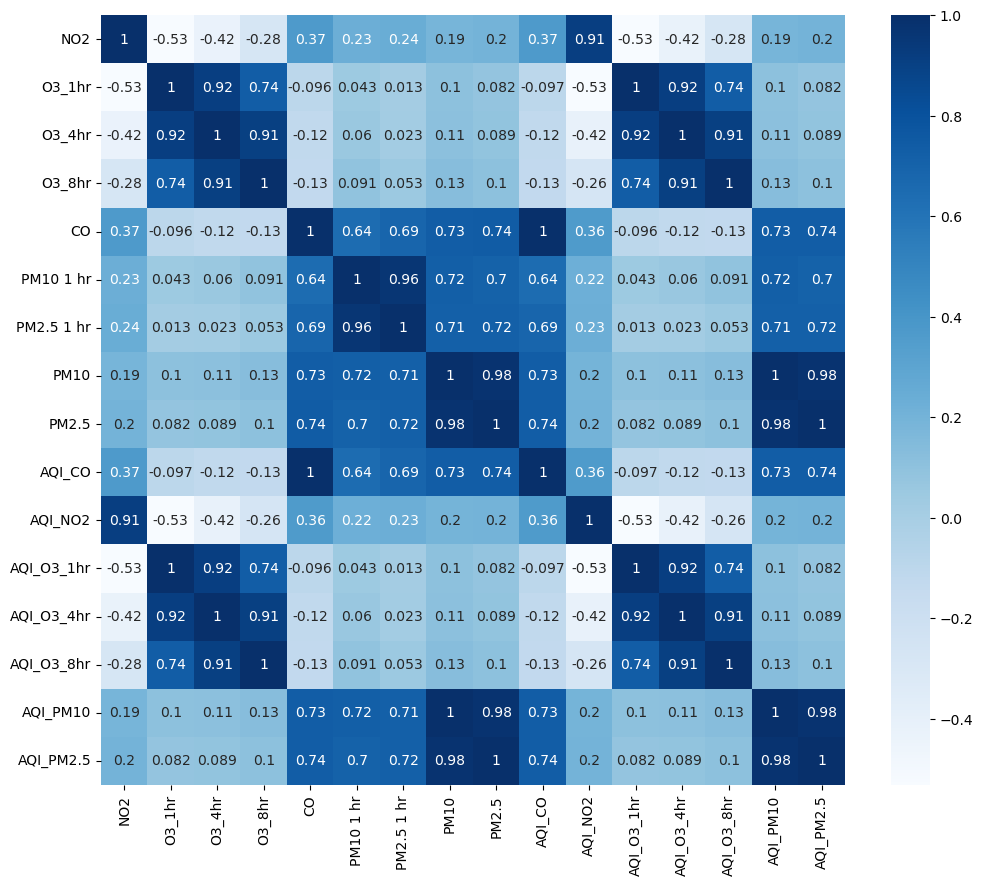

In [28]:
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "Blues")

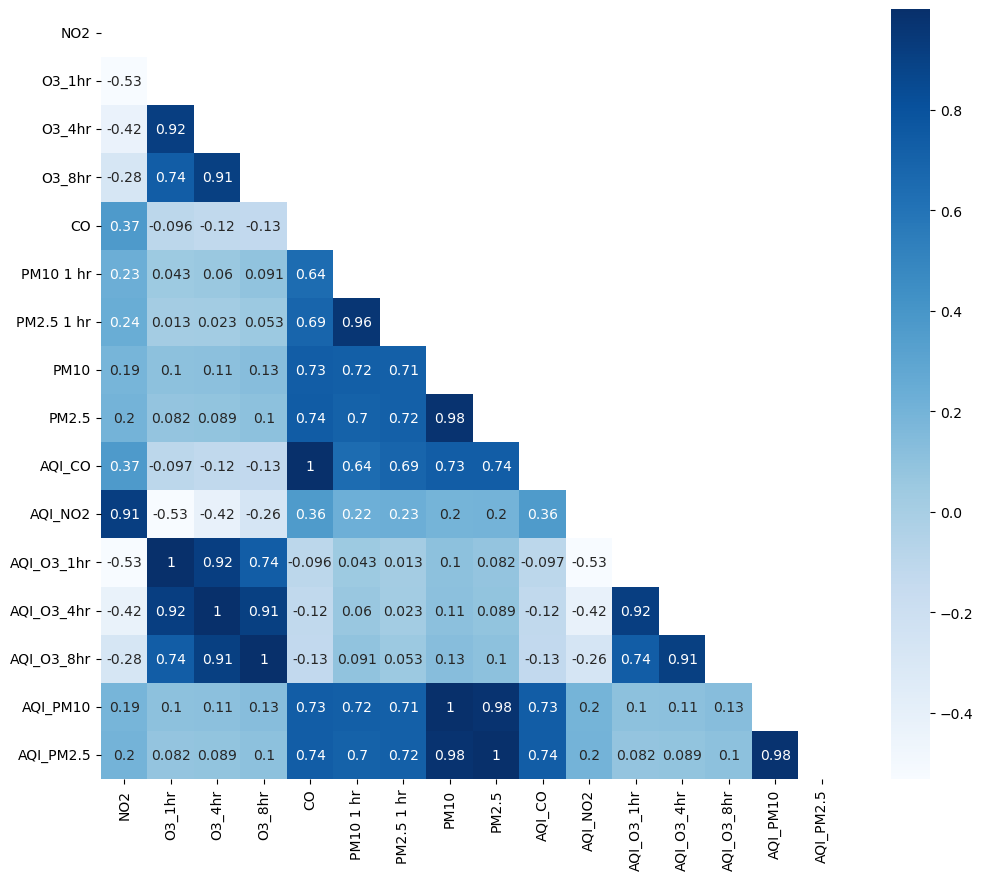

In [29]:
import numpy as np
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "Blues", mask = mask1);

In [30]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr() # correlation matrix of all the features
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [31]:
corr_features = correlation(X_train, 0.98)
print(len(corr_features))
print(corr_features)

7
{'AQI_O3_1hr', 'AQI_O3_8hr', 'AQI_O3_4hr', 'AQI_PM10', 'AQI_PM2.5', 'AQI_CO', 'PM2.5'}


In [32]:
corr_features.remove('PM2.5')
corr_features.add('AQI_NO2')

In [33]:
corr_features

{'AQI_CO',
 'AQI_NO2',
 'AQI_O3_1hr',
 'AQI_O3_4hr',
 'AQI_O3_8hr',
 'AQI_PM10',
 'AQI_PM2.5'}

In [34]:
X_train.drop(corr_features,axis='columns', inplace=True)
X_test.drop(corr_features,axis='columns', inplace=True)

In [35]:
X_train.head()

,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,PM10,PM2.5
63407,0.005848,0.236220,0.211864,0.149533,0.014008,0.010768,0.009539,0.004926,0.005393
63725,0.005848,0.267717,0.237288,0.261682,0.009941,0.014419,0.007949,0.011494,0.003852
71316,0.064327,0.015748,0.016949,0.037383,0.021690,0.014419,0.010731,0.010673,0.006163
52812,0.005848,0.236220,0.254237,0.271028,0.009941,0.010768,0.009539,0.003284,0.003852
19050,0.005848,0.259843,0.271186,0.271028,0.009038,0.014784,0.010334,0.010673,0.004622


In [36]:
X_test.head()

,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,PM10,PM2.5
61846,0.122807,0.047244,0.110169,0.168224,0.018979,0.025370,0.017886,0.016420,0.007704
68168,0.005848,0.228346,0.220339,0.242991,0.009941,0.010768,0.008744,0.006568,0.004622
52366,0.064327,0.007874,0.025424,0.037383,0.035246,0.012594,0.011526,0.012315,0.013867
74133,0.064327,0.141732,0.161017,0.214953,0.010393,0.009308,0.007154,0.006568,0.008475
37891,0.005848,0.031496,0.050847,0.074766,0.011297,0.009673,0.008347,0.002463,0.003082


In [37]:
train_df = X_train.copy()        
train_df['AQI_Site'] = y_train                   
test_df  = X_test.copy()
test_df['AQI_Site']  = y_test

df_all = pd.concat([train_df, test_df], axis=0)
df_all = df_all.sort_index()

In [38]:
df_all

,NO2,O3_1hr,O3_4hr,O3_8hr,CO,PM10 1 hr,PM2.5 1 hr,PM10,PM2.5,AQI_Site
0,0.005848,0.212598,0.211864,0.214953,0.010393,0.011863,0.010334,0.004926,0.003852,31.0
1,0.005848,0.236220,0.254237,0.271028,0.006778,0.009308,0.007949,0.004926,0.003852,44.0
2,0.005848,0.125984,0.135593,0.158879,0.013556,0.014419,0.010731,0.010673,0.007704,30.0
3,0.005848,0.228346,0.262712,0.280374,0.009941,0.007483,0.008347,0.001642,0.003852,47.0
4,0.005848,0.165354,0.186441,0.186916,0.010393,0.013689,0.007552,0.007389,0.005393,31.0
...,...,...,...,...,...,...,...,...,...,...
86870,0.011696,0.125984,0.144068,0.158879,0.006326,0.013262,0.010028,0.005542,0.004376,21.0
86871,0.011696,0.118110,0.135593,0.158879,0.006326,0.012751,0.009885,0.005476,0.004399,20.0
86872,0.005848,0.149606,0.161017,0.177570,0.018527,0.011692,0.010155,0.005279,0.004230,24.0
86873,0.011696,0.118110,0.135593,0.158879,0.006326,0.012298,0.009197,0.005361,0.004322,20.0


In [39]:
# df_all.to_csv('aqi_feature_selected.csv', index=False)

# Training and Evaluation of various ML models

In [40]:
df = pd.read_csv("aqi_feature_scaled.csv")
df.drop(columns=['Name', 'GPS', 'DateTime', 'Date', 'Time'], inplace=True)
df.columns

Index(['NO2', 'O3_1hr', 'O3_4hr', 'O3_8hr', 'CO', 'PM10 1 hr', 'PM2.5 1 hr',
       'PM10', 'PM2.5', 'AQI_CO', 'AQI_NO2', 'AQI_O3_1hr', 'AQI_O3_4hr',
       'AQI_O3_8hr', 'AQI_PM10', 'AQI_PM2.5', 'AQI_Site'],
      dtype='object')

In [41]:
# dataset before feature selection , bfs = before feature selection
from sklearn.model_selection import train_test_split

X = df.drop(columns=["AQI_Site"])
y = df["AQI_Site"]
X_train_bfs, X_test_bfs, y_train_bfs, y_test_bfs = train_test_split(X, y, test_size=0.2, random_state=24)

In [42]:
# dataset before feature selection , afs = after feature selection
df_feature_selected = pd.read_csv("aqi_feature_selected.csv")

X = df_feature_selected.drop(columns=["AQI_Site"])
y = df_feature_selected["AQI_Site"]
X_train_afs, X_test_afs, y_train_afs, y_test_afs = train_test_split(X, y, test_size=0.2, random_state=24)

## Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

#before feature selection
lr_bfs = LinearRegression()
lr_bfs.fit(X_train_bfs, y_train_bfs)

y_pred = lr_bfs.predict(X_test_bfs)

y_train_pred = lr_bfs.predict(X_train_bfs)

lr_bfs_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
lr_bfs_test_mae = mean_absolute_error(y_test_bfs, y_pred)
lr_bfs_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
lr_bfs_test_mse = mean_squared_error(y_test_bfs, y_pred)
lr_bfs_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
lr_bfs_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
lr_bfs_train_r2 = r2_score(y_train_bfs, y_train_pred)
lr_bfs_test_r2 = r2_score(y_test_bfs, y_pred)

print("Linear Regression - Before Feature Selection")
print("Train MAE: ", lr_bfs_train_mae)
print("Test MAE: ", lr_bfs_test_mae)
print("Train MSE: ", lr_bfs_train_mse)
print("Test MSE: ", lr_bfs_test_mse)
print("Train RMSE: ", lr_bfs_train_rmse)
print("Test RMSE: ", lr_bfs_test_rmse)
print("Train R2: ", lr_bfs_train_r2)
print("Test R2: ", lr_bfs_test_r2)

Linear Regression - Before Feature Selection
Train MAE:  6.823370942262401
Test MAE:  6.827269329356839
Train MSE:  89.26148850237654
Test MSE:  90.68445595113886
Train RMSE:  9.447829830303705
Test RMSE:  9.522838649853249
Train R2:  0.9951910987676567
Test R2:  0.9953251451218293


In [44]:
#after feature selection
lr_afs = LinearRegression()
lr_afs.fit(X_train_afs, y_train_afs)

y_pred = lr_afs.predict(X_test_afs)

y_train_pred = lr_afs.predict(X_train_afs)

lr_afs_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
lr_afs_test_mae = mean_absolute_error(y_test_afs, y_pred)
lr_afs_train_mse = mean_squared_error(y_train_afs, y_train_pred)
lr_afs_test_mse = mean_squared_error(y_test_afs, y_pred)
lr_afs_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
lr_afs_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
lr_afs_train_r2 = r2_score(y_train_afs, y_train_pred)
lr_afs_test_r2 = r2_score(y_test_afs, y_pred)

print("Linear Regression - After Feature Selection")
print("Train MAE: ", lr_afs_train_mae)
print("Test MAE: ", lr_afs_test_mae)
print("Train MSE: ", lr_afs_train_mse)
print("Test MSE: ", lr_afs_test_mse)
print("Train RMSE: ", lr_afs_train_rmse)
print("Test RMSE: ", lr_afs_test_rmse)
print("Train R2: ", lr_afs_train_r2)
print("Test R2: ", lr_afs_test_r2)

Linear Regression - After Feature Selection
Train MAE:  6.900408408388958
Test MAE:  6.890007902288817
Train MSE:  90.68676930756624
Test MSE:  91.76827128816784
Train RMSE:  9.522960112673278
Test RMSE:  9.579575736334457
Train R2:  0.9951143127456498
Test R2:  0.9952692735905707


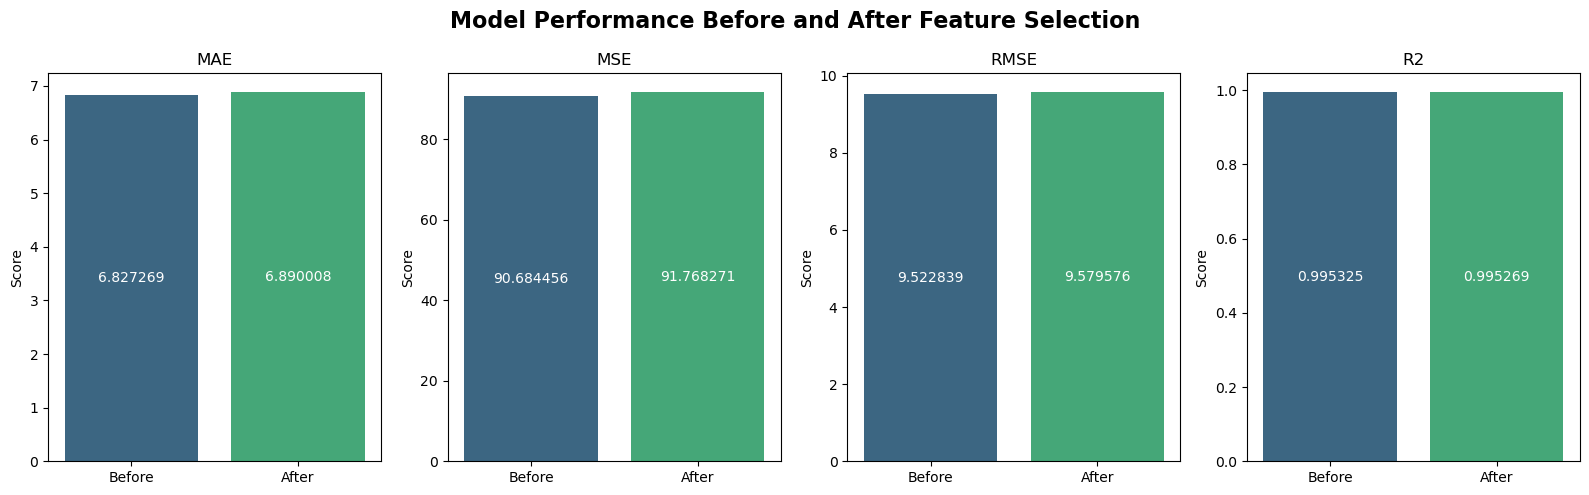

In [73]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        lr_bfs_test_mae,
        lr_bfs_test_mse,
        lr_bfs_test_rmse,
        lr_bfs_test_r2,
    ],
    "After": [
        lr_afs_test_mae,
        lr_afs_test_mse,
        lr_afs_test_rmse,
        lr_afs_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("Model Performance Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

## K-Nearest Neighbors

In [62]:
# with default hyperparameters
from sklearn.neighbors import KNeighborsRegressor

#before feature selection
knn_bfs = KNeighborsRegressor()
knn_bfs.fit(X_train_bfs, y_train_bfs)
y_pred = knn_bfs.predict(X_test_bfs)
y_train_pred = knn_bfs.predict(X_train_bfs)

knn_bfs_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
knn_bfs_test_mae = mean_absolute_error(y_test_bfs, y_pred)
knn_bfs_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
knn_bfs_test_mse = mean_squared_error(y_test_bfs, y_pred)
knn_bfs_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
knn_bfs_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
knn_bfs_train_r2 = r2_score(y_train_bfs, y_train_pred)
knn_bfs_test_r2 = r2_score(y_test_bfs, y_pred)

print("KNN - Before Feature Selection")
print("Train MAE: ", knn_bfs_train_mae)
print("Test MAE: ", knn_bfs_test_mae)
print("Train MSE: ", knn_bfs_train_mse)
print("Test MSE: ", knn_bfs_test_mse)
print("Train RMSE: ", knn_bfs_train_rmse)
print("Test RMSE: ", knn_bfs_test_rmse)
print("Train R2: ", knn_bfs_train_r2)
print("Test R2: ", knn_bfs_test_r2)


KNN - Before Feature Selection
Train MAE:  4.873974100719424
Test MAE:  6.224080575539568
Train MSE:  150.99511251798558
Test MSE:  236.8677087769784
Train RMSE:  12.288006857012475
Test RMSE:  15.390507099409636
Train R2:  0.9918652422803118
Test R2:  0.9877892837064183


In [63]:
#after feature selection
knn_afs = KNeighborsRegressor()
knn_afs.fit(X_train_afs, y_train_afs)
y_pred = knn_afs.predict(X_test_afs)
y_train_pred = knn_afs.predict(X_train_afs)

knn_afs_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
knn_afs_test_mae = mean_absolute_error(y_test_afs, y_pred)
knn_afs_train_mse = mean_squared_error(y_train_afs, y_train_pred)
knn_afs_test_mse = mean_squared_error(y_test_afs, y_pred)
knn_afs_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
knn_afs_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
knn_afs_train_r2 = r2_score(y_train_afs, y_train_pred)
knn_afs_test_r2 = r2_score(y_test_afs, y_pred)

print("KNN - Before Feature Selection")
print("Train MAE: ", knn_afs_train_mae)
print("Test MAE: ", knn_afs_test_mae)
print("Train MSE: ", knn_afs_train_mse)
print("Test MSE: ", knn_afs_test_mse)
print("Train RMSE: ", knn_afs_train_rmse)
print("Test RMSE: ", knn_afs_test_rmse)
print("Train R2: ", knn_afs_train_r2)
print("Test R2: ", knn_afs_test_r2)

KNN - Before Feature Selection
Train MAE:  4.928175539568345
Test MAE:  6.267326618705036
Train MSE:  162.44944172661872
Test MSE:  253.16113496402872
Train RMSE:  12.745565571076817
Test RMSE:  15.911038148531626
Train R2:  0.9912481481810397
Test R2:  0.9869493447985453


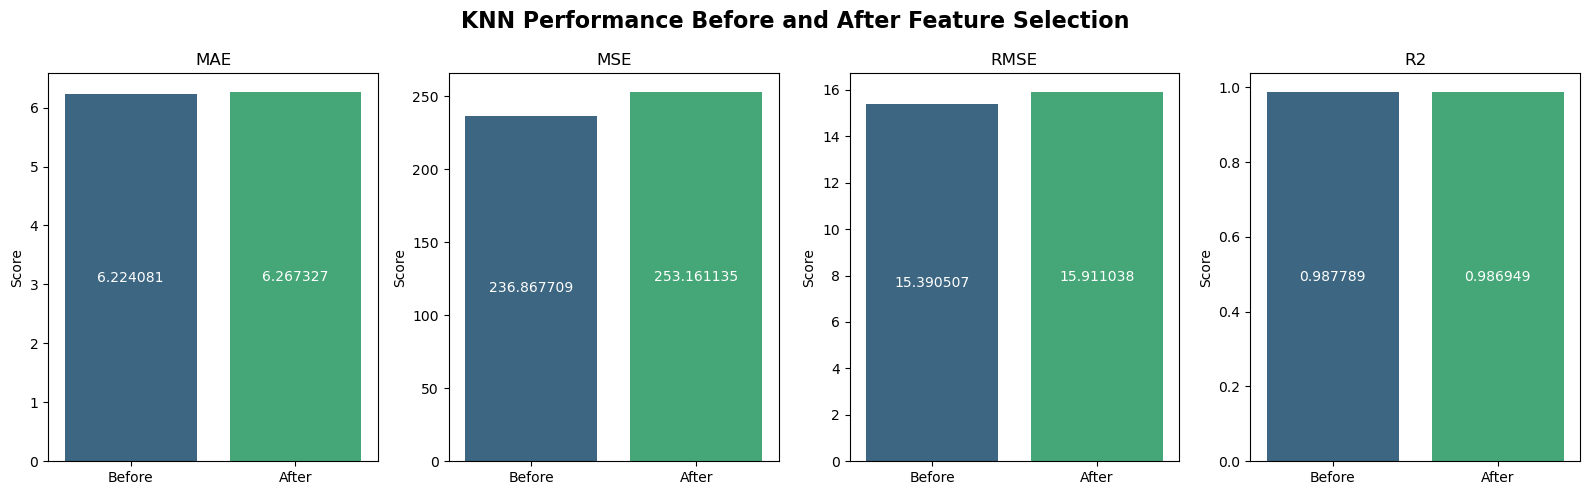

In [74]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        knn_bfs_test_mae,
        knn_bfs_test_mse,
        knn_bfs_test_rmse,
        knn_bfs_test_r2,
    ],
    "After": [
        knn_afs_test_mae,
        knn_afs_test_mse,
        knn_afs_test_rmse,
        knn_afs_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("KNN Performance Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

### Hyperparameter tuning with GridSearchCV

In [64]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
}

knn_base = KNeighborsRegressor()
knn_bfs_gscv = GridSearchCV(
    knn_base, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1
)
knn_bfs_gscv.fit(X_train_bfs, y_train_bfs)

knn_bfs_best_model = knn_bfs_gscv.best_estimator_

y_pred = knn_bfs_best_model.predict(X_test_bfs)
y_train_pred = knn_bfs_best_model.predict(X_train_bfs)
knn_bfs_best_model_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
knn_bfs_best_model_test_mae = mean_absolute_error(y_test_bfs, y_pred)
knn_bfs_best_model_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
knn_bfs_best_model_test_mse = mean_squared_error(y_test_bfs, y_pred)
knn_bfs_best_model_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
knn_bfs_best_model_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
knn_bfs_best_model_train_r2 = r2_score(y_train_bfs, y_train_pred)
knn_bfs_best_model_test_r2 = r2_score(y_test_bfs, y_pred)

print("Best Hyperparameters: ", knn_bfs_gscv.best_params_)

print("KNN (HyperParameter Tuned best model) - Before Feature Selection")
print("Train MAE: ", knn_bfs_best_model_train_mae)
print("Test MAE: ", knn_bfs_best_model_test_mae)
print("Train MSE: ", knn_bfs_best_model_train_mse)
print("Test MSE: ", knn_bfs_best_model_test_mse)
print("Train RMSE: ", knn_bfs_best_model_train_rmse)
print("Test RMSE: ", knn_bfs_best_model_test_rmse)
print("Train R2: ", knn_bfs_best_model_train_r2)
print("Test R2: ", knn_bfs_best_model_test_r2)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Hyperparameters:  {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}
KNN (HyperParameter Tuned best model) - Before Feature Selection
Train MAE:  0.0
Test MAE:  5.997220383074802
Train MSE:  0.0
Test MSE:  190.15276452648823
Train RMSE:  0.0
Test RMSE:  13.789588990484388
Train R2:  1.0
Test R2:  0.990197475746855


In [66]:
# after feature selection
knn_afs_gscv = GridSearchCV(
    knn_base, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1
)
knn_afs_gscv.fit(X_train_afs, y_train_afs)

knn_afs_best_model = knn_afs_gscv.best_estimator_

y_pred = knn_afs_best_model.predict(X_test_afs)
y_train_pred = knn_afs_best_model.predict(X_train_afs)
knn_afs_best_model_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
knn_afs_best_model_test_mae = mean_absolute_error(y_test_afs, y_pred)
knn_afs_best_model_train_mse = mean_squared_error(y_train_afs, y_train_pred)
knn_afs_best_model_test_mse = mean_squared_error(y_test_afs, y_pred)
knn_afs_best_model_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
knn_afs_best_model_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
knn_afs_best_model_train_r2 = r2_score(y_train_afs, y_train_pred)
knn_afs_best_model_test_r2 = r2_score(y_test_afs, y_pred)

print("Best Hyperparameters: ", knn_afs_gscv.best_params_)

print("KNN (HyperParameter Tuned best model) - After Feature Selection")
print("Train MAE: ", knn_afs_best_model_train_mae)
print("Test MAE: ", knn_afs_best_model_test_mae)
print("Train MSE: ", knn_afs_best_model_train_mse)
print("Test MSE: ", knn_afs_best_model_test_mse)
print("Train RMSE: ", knn_afs_best_model_train_rmse)
print("Test RMSE: ", knn_afs_best_model_test_rmse)
print("Train R2: ", knn_afs_best_model_train_r2)
print("Test R2: ", knn_afs_best_model_test_r2)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Hyperparameters:  {'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
KNN (HyperParameter Tuned best model) - After Feature Selection
Train MAE:  0.0002446043165467626
Test MAE:  6.00977575842194
Train MSE:  0.0002949640287769784
Test MSE:  183.0589638087927
Train RMSE:  0.017174516842606617
Test RMSE:  13.529928448029306
Train R2:  0.999999984109016
Test R2:  0.990563166741437


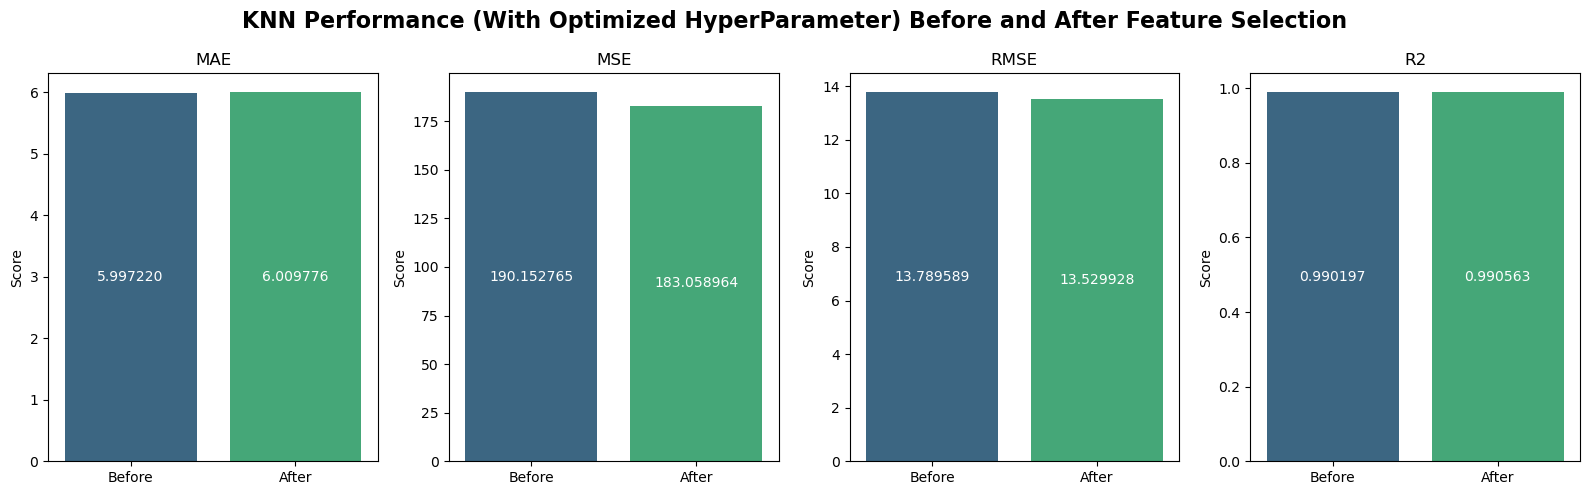

In [76]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        knn_bfs_best_model_test_mae,
        knn_bfs_best_model_test_mse,
        knn_bfs_best_model_test_rmse,
        knn_bfs_best_model_test_r2,
    ],
    "After": [
        knn_afs_best_model_test_mae,
        knn_afs_best_model_test_mse,
        knn_afs_best_model_test_rmse,
        knn_afs_best_model_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("KNN Performance (With Optimized HyperParameter) Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

## Descission Tree

In [77]:
# with default hyperparameters
from sklearn.tree import DecisionTreeRegressor

#before feature selection
dt_bfs = DecisionTreeRegressor()
dt_bfs.fit(X_train_bfs, y_train_bfs)
y_pred = dt_bfs.predict(X_test_bfs)
y_train_pred = dt_bfs.predict(X_train_bfs)

dt_bfs_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
dt_bfs_test_mae = mean_absolute_error(y_test_bfs, y_pred)
dt_bfs_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
dt_bfs_test_mse = mean_squared_error(y_test_bfs, y_pred)
dt_bfs_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
dt_bfs_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
dt_bfs_train_r2 = r2_score(y_train_bfs, y_train_pred)
dt_bfs_test_r2 = r2_score(y_test_bfs, y_pred)

print("Decision Tree - Before Feature Selection")
print("Train MAE: ", dt_bfs_train_mae)
print("Test MAE: ", dt_bfs_test_mae)
print("Train MSE: ", dt_bfs_train_mse)
print("Test MSE: ", dt_bfs_test_mse)
print("Train RMSE: ", dt_bfs_train_rmse)
print("Test RMSE: ", dt_bfs_test_rmse)
print("Train R2: ", dt_bfs_train_r2)
print("Test R2: ", dt_bfs_test_r2)

Decision Tree - Before Feature Selection
Train MAE:  0.0
Test MAE:  1.6432805755395683
Train MSE:  0.0
Test MSE:  16.78135251798561
Train RMSE:  0.0
Test RMSE:  4.096504914922672
Train R2:  1.0
Test R2:  0.9991349081068174


In [78]:
#after feature selection
dt_afs = DecisionTreeRegressor()
dt_afs.fit(X_train_afs, y_train_afs)
y_pred = dt_afs.predict(X_test_afs)
y_train_pred = dt_afs.predict(X_train_afs)

dt_afs_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
dt_afs_test_mae = mean_absolute_error(y_test_afs, y_pred)
dt_afs_train_mse = mean_squared_error(y_train_afs, y_train_pred)
dt_afs_test_mse = mean_squared_error(y_test_afs, y_pred)
dt_afs_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
dt_afs_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
dt_afs_train_r2 = r2_score(y_train_afs, y_train_pred)
dt_afs_test_r2 = r2_score(y_test_afs, y_pred)

print("Decision Tree - Before Feature Selection")
print("Train MAE: ", dt_afs_train_mae)
print("Test MAE: ", dt_afs_test_mae)
print("Train MSE: ", dt_afs_train_mse)
print("Test MSE: ", dt_afs_test_mse)
print("Train RMSE: ", dt_afs_train_rmse)
print("Test RMSE: ", dt_afs_test_rmse)
print("Train R2: ", dt_afs_train_r2)
print("Test R2: ", dt_afs_test_r2)

Decision Tree - Before Feature Selection
Train MAE:  0.0002446043165467626
Test MAE:  2.4446043165467626
Train MSE:  0.0002949640287769784
Test MSE:  22.28589928057554
Train RMSE:  0.017174516842606617
Test RMSE:  4.720794348473097
Train R2:  0.999999984109016
Test R2:  0.9988511444009506


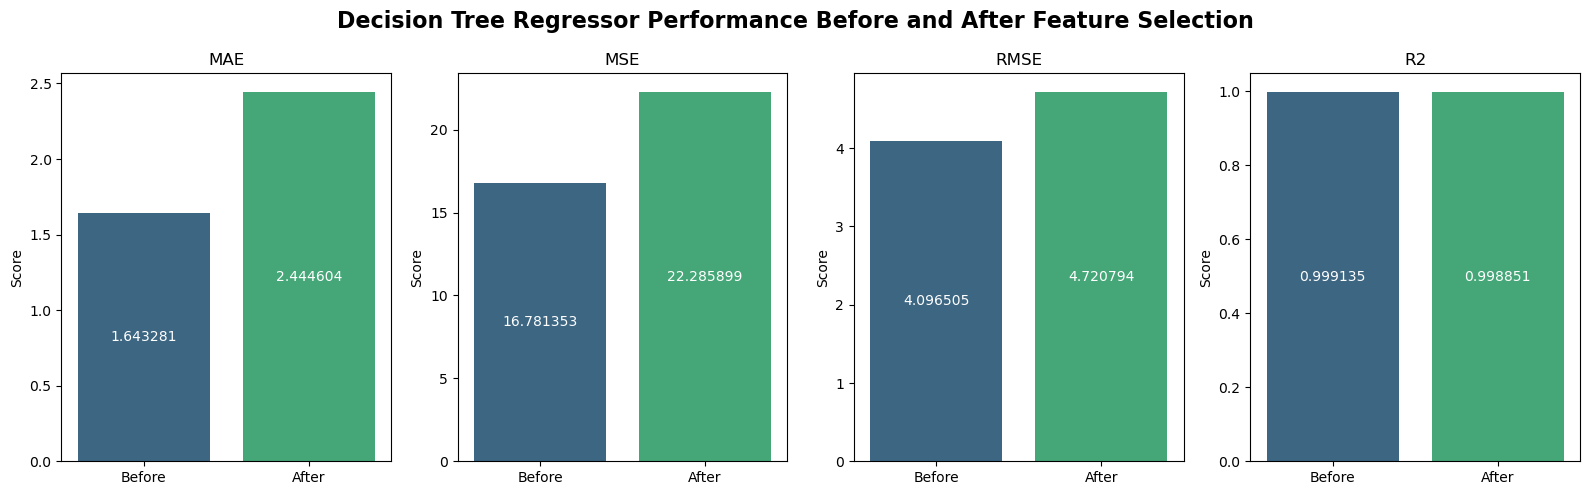

In [80]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        dt_bfs_test_mae,
        dt_bfs_test_mse,
        dt_bfs_test_rmse,
        dt_bfs_test_r2,
    ],
    "After": [
        dt_afs_test_mae,
        dt_afs_test_mse,
        dt_afs_test_rmse,
        dt_afs_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("Decision Tree Regressor Performance Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

### Hyperparameter tuning with RandomisedSearchCV

In [84]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"],
}

dt_base = DecisionTreeRegressor()
dt_bfs_rscv = RandomizedSearchCV(
    dt_base,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=10,
    random_state=24,
)
dt_bfs_rscv.fit(X_train_bfs, y_train_bfs)
dt_bfs_best_model = dt_bfs_rscv.best_estimator_

y_pred = dt_bfs_best_model.predict(X_test_bfs)
y_train_pred = dt_bfs_best_model.predict(X_train_bfs)

dt_bfs_best_model_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
dt_bfs_best_model_test_mae = mean_absolute_error(y_test_bfs, y_pred)
dt_bfs_best_model_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
dt_bfs_best_model_test_mse = mean_squared_error(y_test_bfs, y_pred)
dt_bfs_best_model_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
dt_bfs_best_model_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
dt_bfs_best_model_train_r2 = r2_score(y_train_bfs, y_train_pred)
dt_bfs_best_model_test_r2 = r2_score(y_test_bfs, y_pred)

print("Best Hyperparameters: ", dt_bfs_rscv.best_params_)
print("Decision Tree (HyperParameter Tuned best model) - Before Feature Selection")
print("Train MAE: ", dt_bfs_best_model_train_mae)
print("Test MAE: ", dt_bfs_best_model_test_mae)
print("Train MSE: ", dt_bfs_best_model_train_mse)
print("Test MSE: ", dt_bfs_best_model_test_mse)
print("Train RMSE: ", dt_bfs_best_model_train_rmse)
print("Test RMSE: ", dt_bfs_best_model_test_rmse)
print("Train R2: ", dt_bfs_best_model_train_r2)
print("Test R2: ", dt_bfs_best_model_test_r2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 15, 'criterion': 'absolute_error'}
Decision Tree (HyperParameter Tuned best model) - Before Feature Selection
Train MAE:  1.467568345323741
Test MAE:  1.8538129496402878
Train MSE:  17.091395683453236
Test MSE:  23.313294964028778
Train RMSE:  4.134174123504383
Test RMSE:  4.8283843016094705
Train R2:  0.9990792128257817
Test R2:  0.9987981813471148


In [85]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"],
}

dt_base = DecisionTreeRegressor()
dt_afs_rscv = RandomizedSearchCV(
    dt_base,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=10,
    random_state=24,
)
dt_afs_rscv.fit(X_train_afs, y_train_afs)
dt_afs_best_model = dt_afs_rscv.best_estimator_

y_pred = dt_afs_best_model.predict(X_test_afs)
y_train_pred = dt_afs_best_model.predict(X_train_afs)

dt_afs_best_model_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
dt_afs_best_model_test_mae = mean_absolute_error(y_test_afs, y_pred)
dt_afs_best_model_train_mse = mean_squared_error(y_train_afs, y_train_pred)
dt_afs_best_model_test_mse = mean_squared_error(y_test_afs, y_pred)
dt_afs_best_model_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
dt_afs_best_model_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
dt_afs_best_model_train_r2 = r2_score(y_train_afs, y_train_pred)
dt_afs_best_model_test_r2 = r2_score(y_test_afs, y_pred)

print("Best Hyperparameters: ", dt_afs_rscv.best_params_)
print("Decision Tree (HyperParameter Tuned best model) - After Feature Selection")
print("Train MAE: ", dt_afs_best_model_train_mae)
print("Test MAE: ", dt_afs_best_model_test_mae)
print("Train MSE: ", dt_afs_best_model_train_mse)
print("Test MSE: ", dt_afs_best_model_test_mse)
print("Train RMSE: ", dt_afs_best_model_train_rmse)
print("Test RMSE: ", dt_afs_best_model_test_rmse)
print("Train R2: ", dt_afs_best_model_train_r2)
print("Test R2: ", dt_afs_best_model_test_r2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 15, 'criterion': 'squared_error'}
Decision Tree (HyperParameter Tuned best model) - After Feature Selection
Train MAE:  2.1357631627680784
Test MAE:  2.420000307344546
Train MSE:  9.590872601733428
Test MSE:  17.85582302251853
Train RMSE:  3.096913399133632
Test RMSE:  4.225615105818149
Train R2:  0.9994832983423473
Test R2:  0.9990795183090082


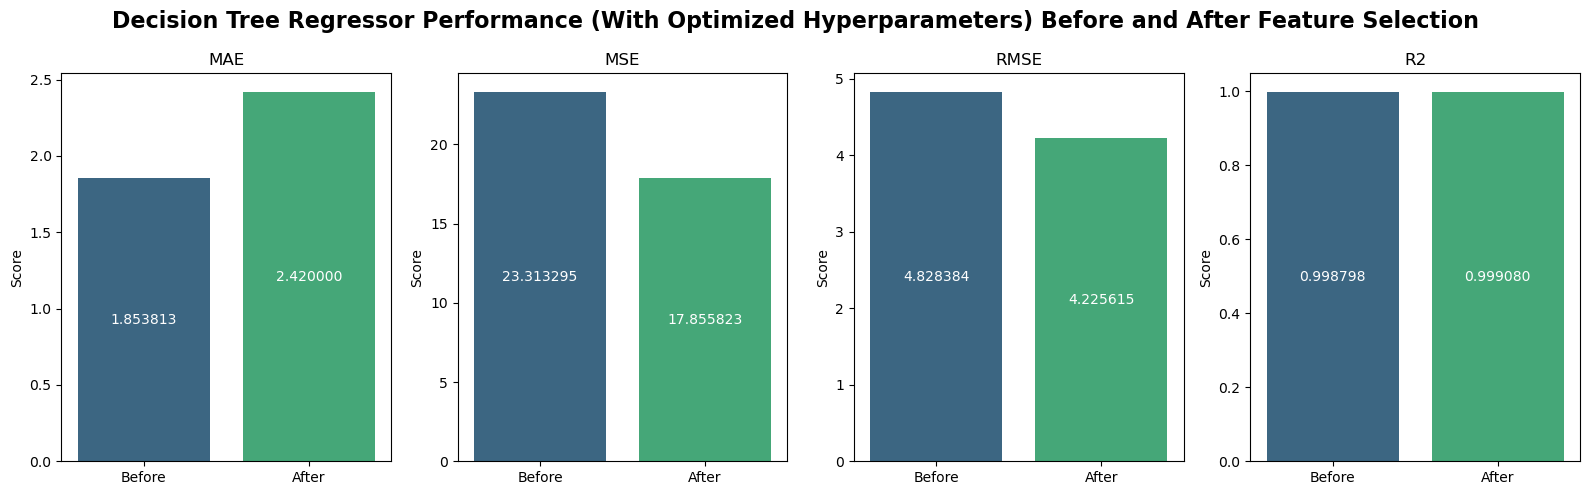

In [87]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        dt_bfs_best_model_test_mae,
        dt_bfs_best_model_test_mse,
        dt_bfs_best_model_test_rmse,
        dt_bfs_best_model_test_r2,
    ],
    "After": [
        dt_afs_best_model_test_mae,
        dt_afs_best_model_test_mse,
        dt_afs_best_model_test_rmse,
        dt_afs_best_model_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(
        data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax
    )
    for container in barplot.containers:
        barplot.bar_label(
            container, fmt="%.6f", label_type="center", fontsize=10, color="white"
        )
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle(
    "Decision Tree Regressor Performance (With Optimized Hyperparameters) Before and After Feature Selection",
    fontsize=16,
    fontweight="bold",
)
plt.tight_layout()
plt.show()

## Random Forest

In [88]:
# with default hyperparameters
from sklearn.ensemble import RandomForestRegressor

#before feature selection
rf_bfs = RandomForestRegressor(random_state=24)
rf_bfs.fit(X_train_bfs, y_train_bfs)
y_pred = rf_bfs.predict(X_test_bfs)
y_train_pred = rf_bfs.predict(X_train_bfs)

rf_bfs_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
rf_bfs_test_mae = mean_absolute_error(y_test_bfs, y_pred)
rf_bfs_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
rf_bfs_test_mse = mean_squared_error(y_test_bfs, y_pred)
rf_bfs_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
rf_bfs_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
rf_bfs_train_r2 = r2_score(y_train_bfs, y_train_pred)
rf_bfs_test_r2 = r2_score(y_test_bfs, y_pred)

print("Random Forest - Before Feature Selection")
print("Train MAE: ", rf_bfs_train_mae)
print("Test MAE: ", rf_bfs_test_mae)
print("Train MSE: ", rf_bfs_train_mse)
print("Test MSE: ", rf_bfs_test_mse)
print("Train RMSE: ", rf_bfs_train_rmse)
print("Test RMSE: ", rf_bfs_test_rmse)
print("Train R2: ", rf_bfs_train_r2)
print("Test R2: ", rf_bfs_test_r2)

Random Forest - Before Feature Selection
Train MAE:  0.5686814388489209
Test MAE:  1.5726906474820144
Train MSE:  1.2000648719424454
Test MSE:  9.491441611510794
Train RMSE:  1.0954747244653549
Test RMSE:  3.080818334714138
Train R2:  0.999935347331325
Test R2:  0.9995107087355484


In [89]:
#after feature selection
rf_afs = RandomForestRegressor(random_state=24)
rf_afs.fit(X_train_afs, y_train_afs)
y_pred = rf_afs.predict(X_test_afs)
y_train_pred = rf_afs.predict(X_train_afs)

rf_afs_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
rf_afs_test_mae = mean_absolute_error(y_test_afs, y_pred)
rf_afs_train_mse = mean_squared_error(y_train_afs, y_train_pred)
rf_afs_test_mse = mean_squared_error(y_test_afs, y_pred)
rf_afs_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
rf_afs_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
rf_afs_train_r2 = r2_score(y_train_afs, y_train_pred)
rf_afs_test_r2 = r2_score(y_test_afs, y_pred)

print("Random Forest - After Feature Selection")
print("Train MAE: ", rf_afs_train_mae)
print("Test MAE: ", rf_afs_test_mae)
print("Train MSE: ", rf_afs_train_mse)
print("Test MSE: ", rf_afs_test_mse)
print("Train RMSE: ", rf_afs_train_rmse)
print("Test RMSE: ", rf_afs_test_rmse)
print("Train R2: ", rf_afs_train_r2)
print("Test R2: ", rf_afs_test_r2)

Random Forest - After Feature Selection
Train MAE:  0.7699414559780747
Test MAE:  2.1042135443645087
Train MSE:  1.5443787691956163
Test MSE:  11.556687267721832
Train RMSE:  1.2427303686623323
Test RMSE:  3.3995127985818545
Train R2:  0.9999167976571868
Test R2:  0.9994042437010582


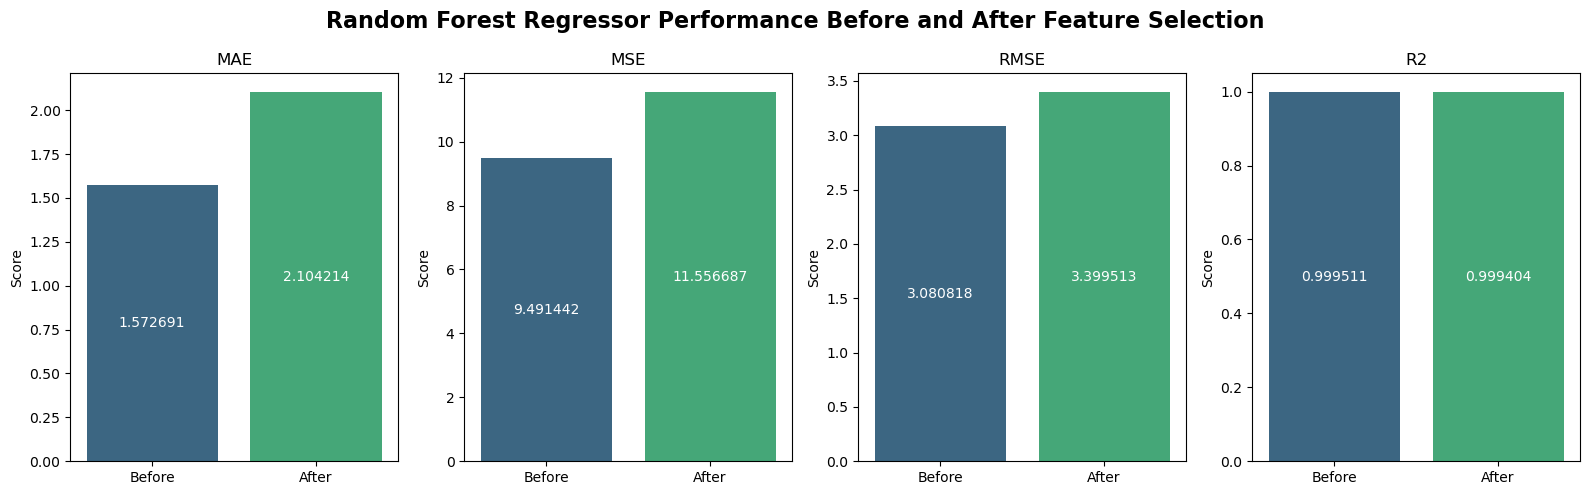

In [90]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        rf_bfs_test_mae,
        rf_bfs_test_mse,
        rf_bfs_test_rmse,
        rf_bfs_test_r2,
    ],
    "After": [
        rf_afs_test_mae,
        rf_afs_test_mse,
        rf_afs_test_rmse,
        rf_afs_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("Random Forest Regressor Performance Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

### Hyperparameter tuning with RandomizedSearchCV

In [91]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"],
}

rf_base = RandomForestRegressor(random_state=24)
rf_bfs_rscv = RandomizedSearchCV(
    rf_base,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=10,
    random_state=24,
)
rf_bfs_rscv.fit(X_train_bfs, y_train_bfs)

rf_bfs_best_model = rf_bfs_rscv.best_estimator_

y_pred = rf_bfs_best_model.predict(X_test_bfs)
y_train_pred = rf_bfs_best_model.predict(X_train_bfs)

rf_bfs_best_model_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
rf_bfs_best_model_test_mae = mean_absolute_error(y_test_bfs, y_pred)
rf_bfs_best_model_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
rf_bfs_best_model_test_mse = mean_squared_error(y_test_bfs, y_pred)
rf_bfs_best_model_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
rf_bfs_best_model_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
rf_bfs_best_model_train_r2 = r2_score(y_train_bfs, y_train_pred)
rf_bfs_best_model_test_r2 = r2_score(y_test_bfs, y_pred)

print("Best Hyperparameters: ", rf_bfs_rscv.best_params_)
print("Random Forest (HyperParameter Tuned best model) - Before Feature Selection")
print("Train MAE: ", rf_bfs_best_model_train_mae)
print("Test MAE: ", rf_bfs_best_model_test_mae)
print("Train MSE: ", rf_bfs_best_model_train_mse)
print("Test MSE: ", rf_bfs_best_model_test_mse)
print("Train RMSE: ", rf_bfs_best_model_train_rmse)
print("Test RMSE: ", rf_bfs_best_model_test_rmse)
print("Train R2: ", rf_bfs_best_model_train_r2)
print("Test R2: ", rf_bfs_best_model_test_r2)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}
Random Forest (HyperParameter Tuned best model) - Before Feature Selection
Train MAE:  2.56005470240724
Test MAE:  2.635777172262464
Train MSE:  14.966871524572717
Test MSE:  19.37192179258559
Train RMSE:  3.8687041143737932
Test RMSE:  4.401354540659681
Train R2:  0.9991936701020068
Test R2:  0.9990013622274979


In [92]:
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"],
}

rf_base = RandomForestRegressor(random_state=24)
rf_afs_rscv = RandomizedSearchCV(
    rf_base,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=10,
    random_state=24,
)
rf_afs_rscv.fit(X_train_afs, y_train_afs)

rf_afs_best_model = rf_afs_rscv.best_estimator_

y_pred = rf_afs_best_model.predict(X_test_afs)
y_train_pred = rf_afs_best_model.predict(X_train_afs)

rf_afs_best_model_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
rf_afs_best_model_test_mae = mean_absolute_error(y_test_afs, y_pred)
rf_afs_best_model_train_mse = mean_squared_error(y_train_afs, y_train_pred)
rf_afs_best_model_test_mse = mean_squared_error(y_test_afs, y_pred)
rf_afs_best_model_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
rf_afs_best_model_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
rf_afs_best_model_train_r2 = r2_score(y_train_afs, y_train_pred)
rf_afs_best_model_test_r2 = r2_score(y_test_afs, y_pred)

print("Best Hyperparameters: ", rf_afs_rscv.best_params_)
print("Random Forest (HyperParameter Tuned best model) - Before Feature Selection")
print("Train MAE: ", rf_afs_best_model_train_mae)
print("Test MAE: ", rf_afs_best_model_test_mae)
print("Train MSE: ", rf_afs_best_model_train_mse)
print("Test MSE: ", rf_afs_best_model_test_mse)
print("Train RMSE: ", rf_afs_best_model_train_rmse)
print("Test RMSE: ", rf_afs_best_model_test_rmse)
print("Train R2: ", rf_afs_best_model_train_r2)
print("Test R2: ", rf_afs_best_model_test_r2)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 10}
Random Forest (HyperParameter Tuned best model) - Before Feature Selection
Train MAE:  2.7229707801637923
Test MAE:  2.800551178492529
Train MSE:  15.16876506424889
Test MSE:  19.42929227145164
Train RMSE:  3.8947098819101904
Test RMSE:  4.407867088678111
Train R2:  0.9991827932265699
Test R2:  0.998998404734285


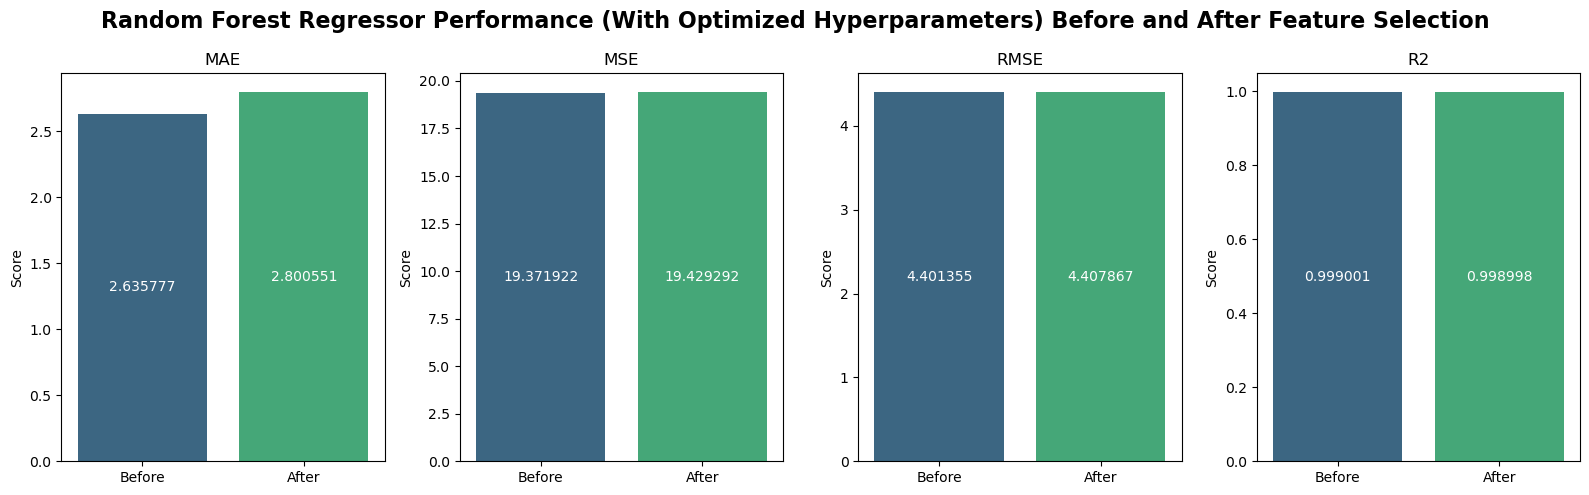

In [97]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        rf_bfs_best_model_test_mae,
        rf_bfs_best_model_test_mse,
        rf_bfs_best_model_test_rmse,
        rf_bfs_best_model_test_r2,
    ],
    "After": [
        rf_afs_best_model_test_mae,
        rf_afs_best_model_test_mse,
        rf_afs_best_model_test_rmse,
        rf_afs_best_model_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("Random Forest Regressor Performance (With Optimized Hyperparameters) Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

## Gradient Boosting

In [94]:
# with default hyperparameters
from sklearn.ensemble import GradientBoostingRegressor

#before feature selection
gb_bfs = GradientBoostingRegressor(random_state=24)
gb_bfs.fit(X_train_bfs, y_train_bfs)
y_pred = gb_bfs.predict(X_test_bfs)
y_train_pred = gb_bfs.predict(X_train_bfs)

gb_bfs_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
gb_bfs_test_mae = mean_absolute_error(y_test_bfs, y_pred)
gb_bfs_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
gb_bfs_test_mse = mean_squared_error(y_test_bfs, y_pred)
gb_bfs_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
gb_bfs_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
gb_bfs_train_r2 = r2_score(y_train_bfs, y_train_pred)
gb_bfs_test_r2 = r2_score(y_test_bfs, y_pred)

print("Gradient Boosting - Before Feature Selection")
print("Train MAE: ", gb_bfs_train_mae)
print("Test MAE: ", gb_bfs_test_mae)
print("Train MSE: ", gb_bfs_train_mse)
print("Test MSE: ", gb_bfs_test_mse)
print("Train RMSE: ", gb_bfs_train_rmse)
print("Test RMSE: ", gb_bfs_test_rmse)
print("Train R2: ", gb_bfs_train_r2)
print("Test R2: ", gb_bfs_test_r2)

Gradient Boosting - Before Feature Selection
Train MAE:  2.9557785427751915
Test MAE:  3.051330879680172
Train MSE:  15.732117104709065
Test MSE:  18.39828119462316
Train RMSE:  3.966373293666276
Test RMSE:  4.28932176394161
Train R2:  0.9991524430232844
Test R2:  0.9990515541644868


In [95]:
#after feature selection
gb_afs = GradientBoostingRegressor(random_state=24)
gb_afs.fit(X_train_afs, y_train_afs)
y_pred = gb_afs.predict(X_test_afs)
y_train_pred = gb_afs.predict(X_train_afs)

gb_afs_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
gb_afs_test_mae = mean_absolute_error(y_test_afs, y_pred)
gb_afs_train_mse = mean_squared_error(y_train_afs, y_train_pred)
gb_afs_test_mse = mean_squared_error(y_test_afs, y_pred)
gb_afs_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
gb_afs_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
gb_afs_train_r2 = r2_score(y_train_afs, y_train_pred)
gb_afs_test_r2 = r2_score(y_test_afs, y_pred)

print("Gradient Boosting - Before Feature Selection")
print("Train MAE: ", gb_afs_train_mae)
print("Test MAE: ", gb_afs_test_mae)
print("Train MSE: ", gb_afs_train_mse)
print("Test MSE: ", gb_afs_test_mse)
print("Train RMSE: ", gb_afs_train_rmse)
print("Test RMSE: ", gb_afs_test_rmse)
print("Train R2: ", gb_afs_train_r2)
print("Test R2: ", gb_afs_test_r2)

Gradient Boosting - Before Feature Selection
Train MAE:  3.027966142775769
Test MAE:  3.1083711874995212
Train MSE:  16.296653087858285
Test MSE:  18.644343590710097
Train RMSE:  4.036911330195188
Test RMSE:  4.3179096320685195
Train R2:  0.9991220290359017
Test R2:  0.9990388694548459


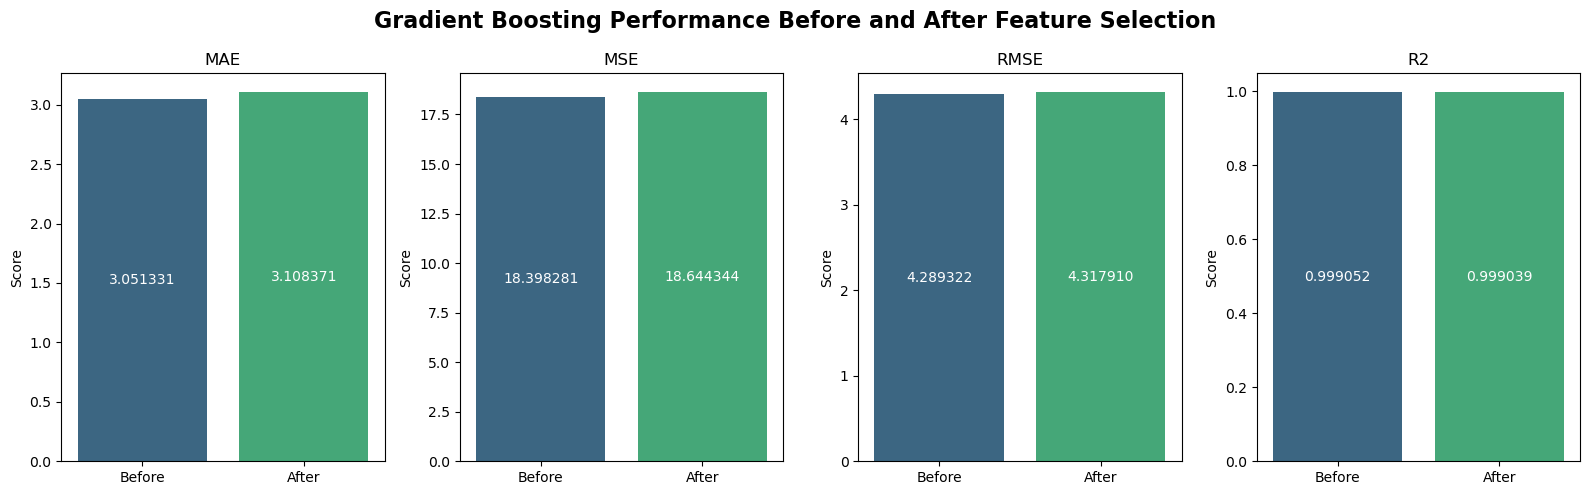

In [98]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        gb_bfs_test_mae,
        gb_bfs_test_mse,
        gb_bfs_test_rmse,
        gb_bfs_test_r2,
    ],
    "After": [
        gb_afs_test_mae,
        gb_afs_test_mse,
        gb_afs_test_rmse,
        gb_afs_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("Gradient Boosting Performance Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

### Hyperparameter tuning with RandomizedSearchCV

In [99]:
#  Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.6, 0.8, 1.0],
    "max_features": [None, "sqrt", "log2"],
}

gb_base = GradientBoostingRegressor(random_state=24)
gb_bfs_rscv = RandomizedSearchCV(
    gb_base,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=10,
    random_state=24,
)

gb_bfs_rscv.fit(X_train_bfs, y_train_bfs)
gb_bfs_best_model = gb_bfs_rscv.best_estimator_

y_pred = gb_bfs_best_model.predict(X_test_bfs)
y_train_pred = gb_bfs_best_model.predict(X_train_bfs)

gb_bfs_best_model_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
gb_bfs_best_model_test_mae = mean_absolute_error(y_test_bfs, y_pred)
gb_bfs_best_model_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
gb_bfs_best_model_test_mse = mean_squared_error(y_test_bfs, y_pred)
gb_bfs_best_model_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
gb_bfs_best_model_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
gb_bfs_best_model_train_r2 = r2_score(y_train_bfs, y_train_pred)
gb_bfs_best_model_test_r2 = r2_score(y_test_bfs, y_pred)

print("Best Hyperparameters: ", gb_bfs_rscv.best_params_)
print("Gradient Boosting (HyperParameter Tuned best model) - Before Feature Selection")
print("Train MAE: ", gb_bfs_best_model_train_mae)
print("Test MAE: ", gb_bfs_best_model_test_mae)
print("Train MSE: ", gb_bfs_best_model_train_mse)
print("Test MSE: ", gb_bfs_best_model_test_mse)
print("Train RMSE: ", gb_bfs_best_model_train_rmse)
print("Test RMSE: ", gb_bfs_best_model_test_rmse)
print("Train R2: ", gb_bfs_best_model_train_r2)
print("Test R2: ", gb_bfs_best_model_test_r2)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.2}
Gradient Boosting (HyperParameter Tuned best model) - Before Feature Selection
Train MAE:  1.8044808728920134
Test MAE:  2.0007610488028535
Train MSE:  6.108284085394132
Test MSE:  8.74275004043329
Train RMSE:  2.471494302116461
Test RMSE:  2.956814170764421
Train R2:  0.9996709204007396
Test R2:  0.9995493043736495


In [100]:
#  Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.6, 0.8, 1.0],
    "max_features": [None, "sqrt", "log2"],
}

gb_base = GradientBoostingRegressor(random_state=24)
gb_afs_rscv = RandomizedSearchCV(
    gb_base,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=10,
    random_state=24,
)

gb_afs_rscv.fit(X_train_afs, y_train_afs)
gb_afs_best_model = gb_afs_rscv.best_estimator_

y_pred = gb_afs_best_model.predict(X_test_afs)
y_train_pred = gb_afs_best_model.predict(X_train_afs)

gb_afs_best_model_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
gb_afs_best_model_test_mae = mean_absolute_error(y_test_afs, y_pred)
gb_afs_best_model_train_mse = mean_squared_error(y_train_afs, y_train_pred)
gb_afs_best_model_test_mse = mean_squared_error(y_test_afs, y_pred)
gb_afs_best_model_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
gb_afs_best_model_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
gb_afs_best_model_train_r2 = r2_score(y_train_afs, y_train_pred)
gb_afs_best_model_test_r2 = r2_score(y_test_afs, y_pred)

print("Best Hyperparameters: ", gb_afs_rscv.best_params_)
print("Gradient Boosting (HyperParameter Tuned best model) - Before Feature Selection")
print("Train MAE: ", gb_afs_best_model_train_mae)
print("Test MAE: ", gb_afs_best_model_test_mae)
print("Train MSE: ", gb_afs_best_model_train_mse)
print("Test MSE: ", gb_afs_best_model_test_mse)
print("Train RMSE: ", gb_afs_best_model_train_rmse)
print("Test RMSE: ", gb_afs_best_model_test_rmse)
print("Train R2: ", gb_afs_best_model_train_r2)
print("Test R2: ", gb_afs_best_model_test_r2)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'learning_rate': 0.2}
Gradient Boosting (HyperParameter Tuned best model) - Before Feature Selection
Train MAE:  2.123680606684583
Test MAE:  2.3212219651497175
Train MSE:  7.687130462589431
Test MSE:  10.542126131247072
Train RMSE:  2.772567485669092
Test RMSE:  3.2468640456981057
Train R2:  0.9995858611392779
Test R2:  0.9994565451239239


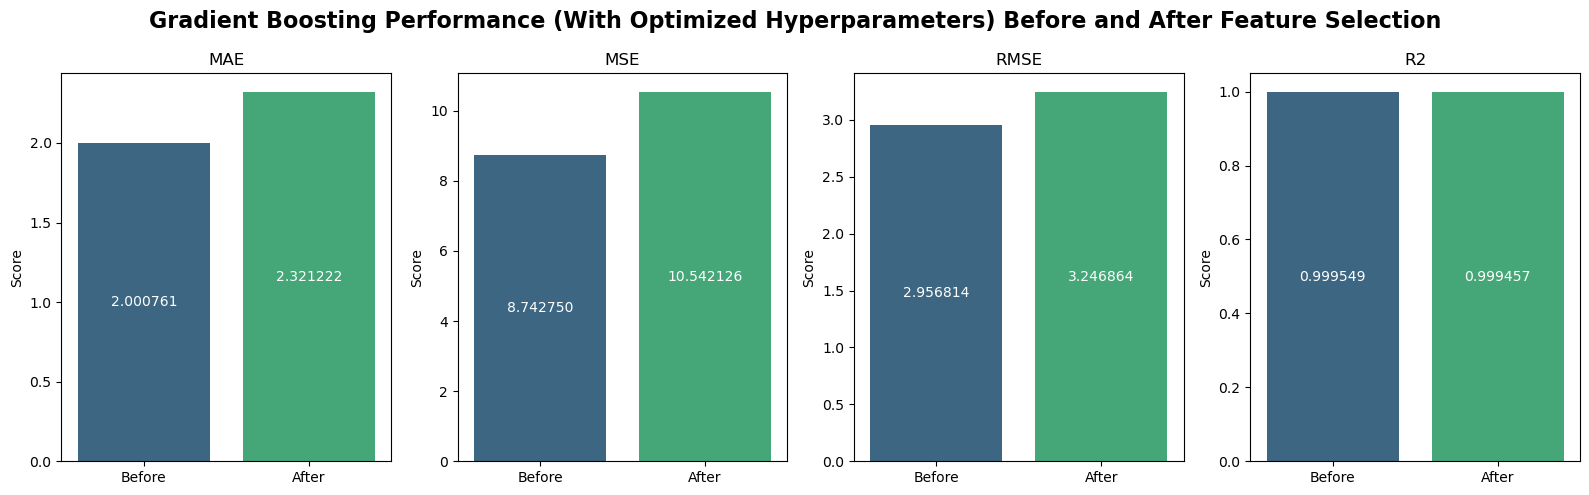

In [101]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        gb_bfs_best_model_test_mae,
        gb_bfs_best_model_test_mse,
        gb_bfs_best_model_test_rmse,
        gb_bfs_best_model_test_r2,
    ],
    "After": [
        gb_afs_best_model_test_mae,
        gb_afs_best_model_test_mse,
        gb_afs_best_model_test_rmse,
        gb_afs_best_model_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("Gradient Boosting Performance (With Optimized Hyperparameters) Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

## AdaBoost

In [102]:
# with default hyperparameters
from sklearn.ensemble import AdaBoostRegressor

#before feature selection
ab_bfs = AdaBoostRegressor(random_state=24)
ab_bfs.fit(X_train_bfs, y_train_bfs)
y_pred = ab_bfs.predict(X_test_bfs)
y_train_pred = ab_bfs.predict(X_train_bfs)

ab_bfs_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
ab_bfs_test_mae = mean_absolute_error(y_test_bfs, y_pred)
ab_bfs_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
ab_bfs_test_mse = mean_squared_error(y_test_bfs, y_pred)
ab_bfs_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
ab_bfs_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
ab_bfs_train_r2 = r2_score(y_train_bfs, y_train_pred)
ab_bfs_test_r2 = r2_score(y_test_bfs, y_pred)

print("AdaBoost - Before Feature Selection")
print("Train MAE: ", ab_bfs_train_mae)
print("Test MAE: ", ab_bfs_test_mae)
print("Train MSE: ", ab_bfs_train_mse)
print("Test MSE: ", ab_bfs_test_mse)
print("Train RMSE: ", ab_bfs_train_rmse)
print("Test RMSE: ", ab_bfs_test_rmse)
print("Train R2: ", ab_bfs_train_r2)
print("Test R2: ", ab_bfs_test_r2)

AdaBoost - Before Feature Selection
Train MAE:  15.568540501038601
Test MAE:  15.779993574855474
Train MSE:  448.45700309965815
Test MSE:  472.0010763067379
Train RMSE:  21.176803420244003
Test RMSE:  21.72558575290291
Train R2:  0.9758396877416902
Test R2:  0.975667974065332


In [103]:
#after feature selection
ab_afs = AdaBoostRegressor(random_state=24)
ab_afs.fit(X_train_afs, y_train_afs)
y_pred = ab_afs.predict(X_test_afs)
y_train_pred = ab_afs.predict(X_train_afs)

ab_afs_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
ab_afs_test_mae = mean_absolute_error(y_test_afs, y_pred)
ab_afs_train_mse = mean_squared_error(y_train_afs, y_train_pred)
ab_afs_test_mse = mean_squared_error(y_test_afs, y_pred)
ab_afs_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
ab_afs_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
ab_afs_train_r2 = r2_score(y_train_afs, y_train_pred)
ab_afs_test_r2 = r2_score(y_test_afs, y_pred)

print("AdaBoost - Before Feature Selection")
print("Train MAE: ", ab_afs_train_mae)
print("Test MAE: ", ab_afs_test_mae)
print("Train MSE: ", ab_afs_train_mse)
print("Test MSE: ", ab_afs_test_mse)
print("Train RMSE: ", ab_afs_train_rmse)
print("Test RMSE: ", ab_afs_test_rmse)
print("Train R2: ", ab_afs_train_r2)
print("Test R2: ", ab_afs_test_r2)

AdaBoost - Before Feature Selection
Train MAE:  16.403767338816824
Test MAE:  16.6059706899677
Train MSE:  473.28049280172024
Test MSE:  496.54934011235866
Train RMSE:  21.755010751588248
Test RMSE:  22.283387087971136
Train R2:  0.9745023393261287
Test R2:  0.9744024917993949


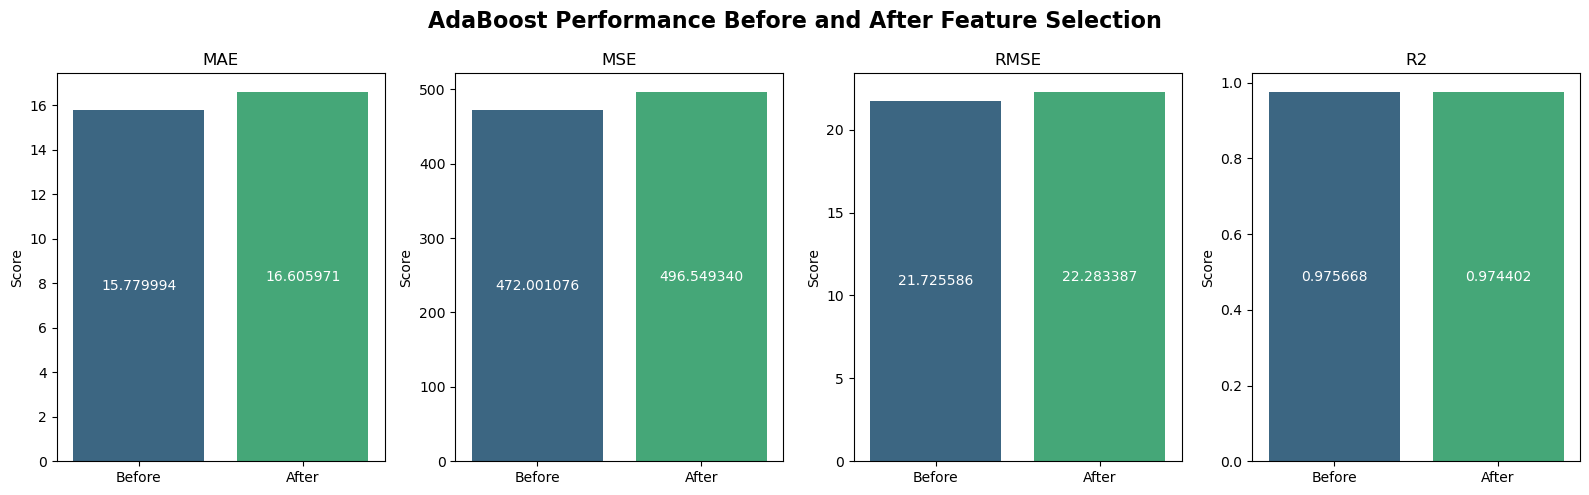

In [104]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        ab_bfs_test_mae,
        ab_bfs_test_mse,
        ab_bfs_test_rmse,
        ab_bfs_test_r2,
    ],
    "After": [
        ab_afs_test_mae,
        ab_afs_test_mse,
        ab_afs_test_rmse,
        ab_afs_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("AdaBoost Performance Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

### Hyperparameter tuning with RandomizedSearchCV

In [105]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor

param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
    "loss": ["linear", "square", "exponential"],
}

ab_base = AdaBoostRegressor(random_state=24)
ab_bfs_rscv = RandomizedSearchCV(
    ab_base,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=10,
    random_state=24,
)
ab_bfs_rscv.fit(X_train_bfs, y_train_bfs)

ab_bfs_best_model = ab_bfs_rscv.best_estimator_

y_pred = ab_bfs_best_model.predict(X_test_bfs)
y_train_pred = ab_bfs_best_model.predict(X_train_bfs)

ab_bfs_best_model_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
ab_bfs_best_model_test_mae = mean_absolute_error(y_test_bfs, y_pred)
ab_bfs_best_model_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
ab_bfs_best_model_test_mse = mean_squared_error(y_test_bfs, y_pred)
ab_bfs_best_model_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
ab_bfs_best_model_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
ab_bfs_best_model_train_r2 = r2_score(y_train_bfs, y_train_pred)
ab_bfs_best_model_test_r2 = r2_score(y_test_bfs, y_pred)

print("Best Hyperparameters: ", ab_bfs_rscv.best_params_)
print("AdaBoost (HyperParameter Tuned best model) - Before Feature Selection")
print("Train MAE: ", ab_bfs_best_model_train_mae)
print("Test MAE: ", ab_bfs_best_model_test_mae)
print("Train MSE: ", ab_bfs_best_model_train_mse)
print("Test MSE: ", ab_bfs_best_model_test_mse)
print("Train RMSE: ", ab_bfs_best_model_train_rmse)
print("Test RMSE: ", ab_bfs_best_model_test_rmse)
print("Train R2: ", ab_bfs_best_model_train_r2)
print("Test R2: ", ab_bfs_best_model_test_r2)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'n_estimators': 50, 'loss': 'exponential', 'learning_rate': 0.1}
AdaBoost (HyperParameter Tuned best model) - Before Feature Selection
Train MAE:  14.571626152856139
Test MAE:  14.704438381932345
Train MSE:  441.4115314060732
Test MSE:  448.8713486498176
Train RMSE:  21.00979608197265
Test RMSE:  21.186584166632844
Train R2:  0.9762192576780443
Test R2:  0.9768603296794626


In [106]:
# hyperparameter tuning after feature selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor

param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
    "loss": ["linear", "square", "exponential"],
}

ab_base = AdaBoostRegressor(random_state=24)
ab_afs_rscv = RandomizedSearchCV(
    ab_base,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=10,
    random_state=24,
)
ab_afs_rscv.fit(X_train_afs, y_train_afs)

ab_afs_best_model = ab_afs_rscv.best_estimator_

y_pred = ab_afs_best_model.predict(X_test_afs)
y_train_pred = ab_afs_best_model.predict(X_train_afs)

ab_afs_best_model_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
ab_afs_best_model_test_mae = mean_absolute_error(y_test_afs, y_pred)
ab_afs_best_model_train_mse = mean_squared_error(y_train_afs, y_train_pred)
ab_afs_best_model_test_mse = mean_squared_error(y_test_afs, y_pred)
ab_afs_best_model_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
ab_afs_best_model_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
ab_afs_best_model_train_r2 = r2_score(y_train_afs, y_train_pred)
ab_afs_best_model_test_r2 = r2_score(y_test_afs, y_pred)

print("Best Hyperparameters: ", ab_afs_rscv.best_params_)
print("AdaBoost (HyperParameter Tuned best model) - Before Feature Selection")
print("Train MAE: ", ab_afs_best_model_train_mae)
print("Test MAE: ", ab_afs_best_model_test_mae)
print("Train MSE: ", ab_afs_best_model_train_mse)
print("Test MSE: ", ab_afs_best_model_test_mse)
print("Train RMSE: ", ab_afs_best_model_train_rmse)
print("Test RMSE: ", ab_afs_best_model_test_rmse)
print("Train R2: ", ab_afs_best_model_train_r2)
print("Test R2: ", ab_afs_best_model_test_r2)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'n_estimators': 100, 'loss': 'exponential', 'learning_rate': 0.05}
AdaBoost (HyperParameter Tuned best model) - Before Feature Selection
Train MAE:  14.62506450710939
Test MAE:  14.764341065836051
Train MSE:  438.02123959711435
Test MSE:  447.25550558433196
Train RMSE:  20.92895696390803
Test RMSE:  21.148416148362788
Train R2:  0.976401907314877
Test R2:  0.9769436276576863


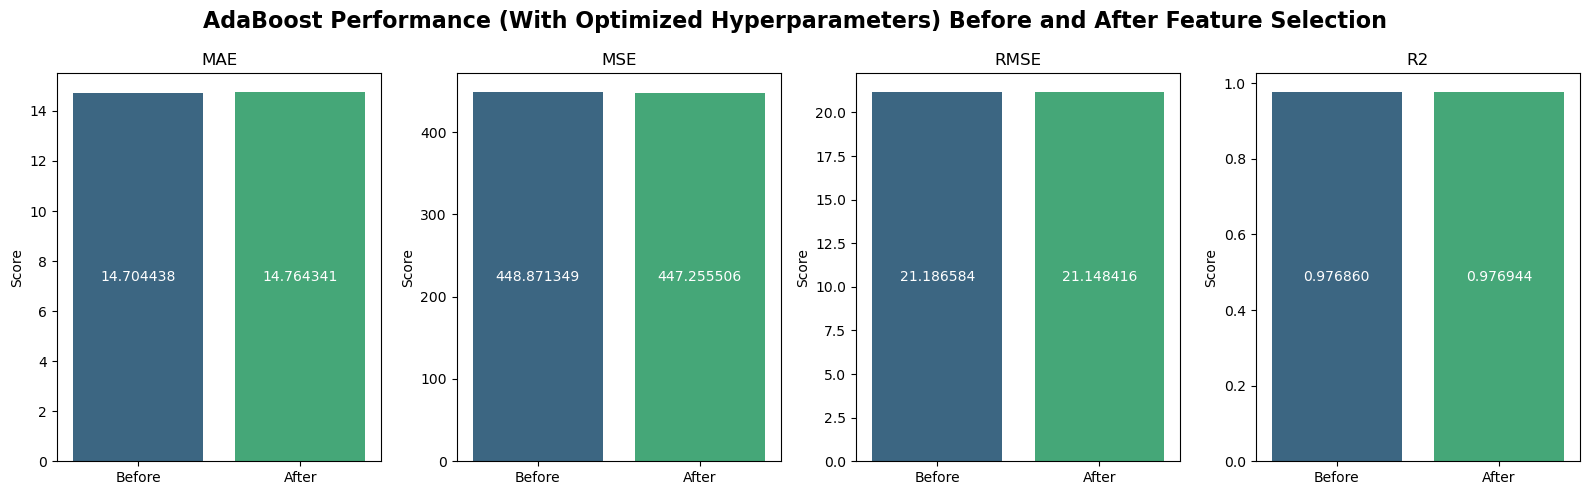

In [107]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        ab_bfs_best_model_test_mae,
        ab_bfs_best_model_test_mse,
        ab_bfs_best_model_test_rmse,
        ab_bfs_best_model_test_r2,
    ],
    "After": [
        ab_afs_best_model_test_mae,
        ab_afs_best_model_test_mse,
        ab_afs_best_model_test_rmse,
        ab_afs_best_model_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("AdaBoost Performance (With Optimized Hyperparameters) Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

## Stacking

In [111]:
from sklearn.ensemble import StackingRegressor


base_models = [
    ('rf', rf_bfs_best_model),
    ('dt', dt_afs_best_model),
    ('knn', knn_afs_best_model),
    ('ab', ab_afs_best_model),
    ('lr', lr_bfs)
]

#before feature selection
stack_bfs = StackingRegressor(
    estimators=base_models,
    final_estimator=gb_bfs_best_model
)
stack_bfs.fit(X_train_bfs, y_train_bfs)
y_pred = stack_bfs.predict(X_test_bfs)
y_train_pred = stack_bfs.predict(X_train_bfs)

stack_bfs_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
stack_bfs_test_mae = mean_absolute_error(y_test_bfs, y_pred)
stack_bfs_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
stack_bfs_test_mse = mean_squared_error(y_test_bfs, y_pred)
stack_bfs_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
stack_bfs_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
stack_bfs_train_r2 = r2_score(y_train_bfs, y_train_pred)
stack_bfs_test_r2 = r2_score(y_test_bfs, y_pred)

print("Stacking Regressor - Before Feature Selection")
print("Train MAE: ", stack_bfs_train_mae)
print("Test MAE: ", stack_bfs_test_mae)
print("Train MSE: ", stack_bfs_train_mse)
print("Test MSE: ", stack_bfs_test_mse)
print("Train RMSE: ", stack_bfs_train_rmse)
print("Test RMSE: ", stack_bfs_test_rmse)
print("Train R2: ", stack_bfs_train_r2)
print("Test R2: ", stack_bfs_test_r2)

Stacking Regressor - Before Feature Selection
Train MAE:  1.7283763155003549
Test MAE:  2.1675663274287897
Train MSE:  7.851880016381815
Test MSE:  13.57744352071319
Train RMSE:  2.8021206284494276
Test RMSE:  3.6847582716798657
Train R2:  0.9995769853705052
Test R2:  0.9993000721302217


In [112]:
#after feature selection
stack_afs = StackingRegressor(
    estimators=base_models,
    final_estimator=gb_bfs_best_model
)
stack_afs.fit(X_train_afs, y_train_afs)
y_pred = stack_afs.predict(X_test_afs)
y_train_pred = stack_afs.predict(X_train_afs)

stack_afs_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
stack_afs_test_mae = mean_absolute_error(y_test_afs, y_pred)
stack_afs_train_mse = mean_squared_error(y_train_afs, y_train_pred)
stack_afs_test_mse = mean_squared_error(y_test_afs, y_pred)
stack_afs_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
stack_afs_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
stack_afs_train_r2 = r2_score(y_train_afs, y_train_pred)
stack_afs_test_r2 = r2_score(y_test_afs, y_pred)

print("Stacking Regressor - After Feature Selection")
print("Train MAE: ", stack_afs_train_mae)
print("Test MAE: ", stack_afs_test_mae)
print("Train MSE: ", stack_afs_train_mse)
print("Test MSE: ", stack_afs_test_mse)
print("Train RMSE: ", stack_afs_train_rmse)
print("Test RMSE: ", stack_afs_test_rmse)
print("Train R2: ", stack_afs_train_r2)
print("Test R2: ", stack_afs_test_r2)

Stacking Regressor - After Feature Selection
Train MAE:  2.0813181811856474
Test MAE:  2.4633272633021717
Train MSE:  9.729782369173138
Test MSE:  15.859277981239032
Train RMSE:  3.1192599072813953
Test RMSE:  3.9823708995068543
Train R2:  0.9994758146742724
Test R2:  0.9991824417728788


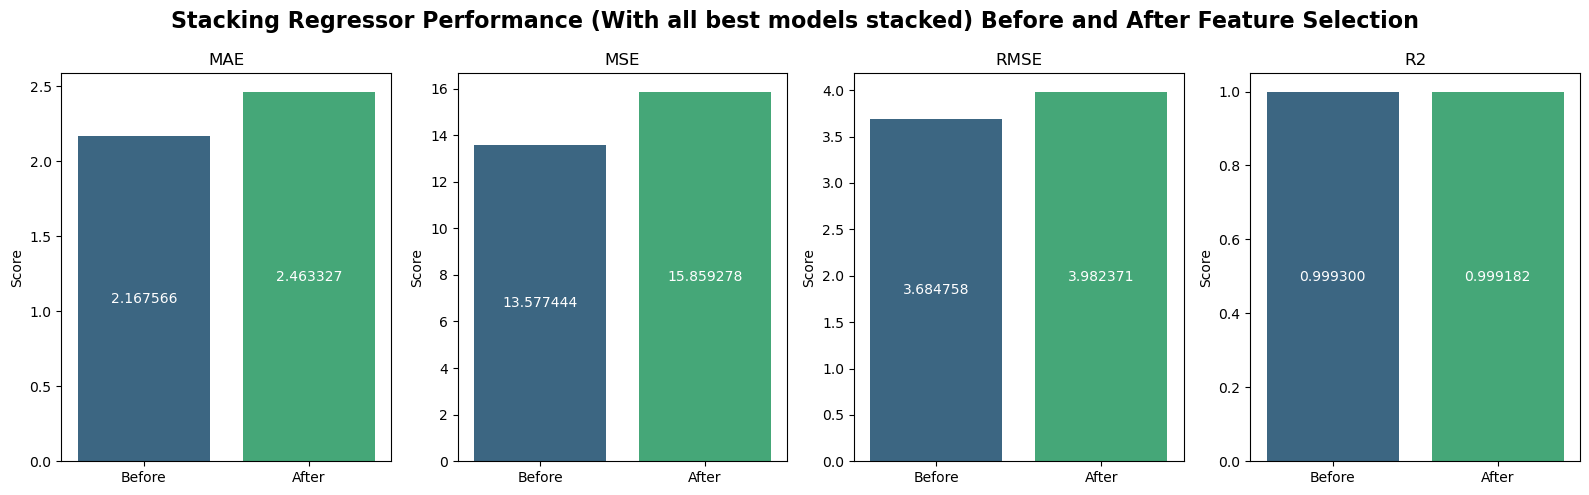

In [113]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        stack_bfs_test_mae,
        stack_bfs_test_mse,
        stack_bfs_test_rmse,
        stack_bfs_test_r2,
    ],
    "After": [
        stack_afs_test_mae,
        stack_afs_test_mse,
        stack_afs_test_rmse,
        stack_afs_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("Stacking Regressor Performance (With all best models stacked) Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

## Bagging Regressor

In [120]:
# with default hyperparameters
from sklearn.ensemble import BaggingRegressor

#before feature selection
bag_bfs = BaggingRegressor(random_state=24)
bag_bfs.fit(X_train_bfs, y_train_bfs)
y_pred = bag_bfs.predict(X_test_bfs)
y_train_pred = bag_bfs.predict(X_train_bfs)

bag_bfs_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
bag_bfs_test_mae = mean_absolute_error(y_test_bfs, y_pred)
bag_bfs_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
bag_bfs_test_mse = mean_squared_error(y_test_bfs, y_pred)
bag_bfs_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
bag_bfs_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
bag_bfs_train_r2 = r2_score(y_train_bfs, y_train_pred)
bag_bfs_test_r2 = r2_score(y_test_bfs, y_pred)

print("Bagging Regressor - Before Feature Selection")
print("Train MAE: ", bag_bfs_train_mae)
print("Test MAE: ", bag_bfs_test_mae)
print("Train MSE: ", bag_bfs_train_mse)
print("Test MSE: ", bag_bfs_test_mse)
print("Train RMSE: ", bag_bfs_train_rmse)
print("Test RMSE: ", bag_bfs_test_rmse)
print("Train R2: ", bag_bfs_train_r2)
print("Test R2: ", bag_bfs_test_r2)

Bagging Regressor - Before Feature Selection
Train MAE:  0.6103568345323741
Test MAE:  1.619551079136691
Train MSE:  2.310993669064749
Test MSE:  11.915517122302154
Train RMSE:  1.520195273333248
Test RMSE:  3.451886023944324
Train R2:  0.9998754968073067
Test R2:  0.9993857457404262


In [121]:
#after feature selection
bag_afs = BaggingRegressor(random_state=24)
bag_afs.fit(X_train_afs, y_train_afs)
y_pred = bag_afs.predict(X_test_afs)
y_train_pred = bag_afs.predict(X_train_afs)

bag_afs_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
bag_afs_test_mae = mean_absolute_error(y_test_afs, y_pred)
bag_afs_train_mse = mean_squared_error(y_train_afs, y_train_pred)
bag_afs_test_mse = mean_squared_error(y_test_afs, y_pred)
bag_afs_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
bag_afs_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
bag_afs_train_r2 = r2_score(y_train_afs, y_train_pred)
bag_afs_test_r2 = r2_score(y_test_afs, y_pred)

print("Bagging Regressor - Before Feature Selection")
print("Train MAE: ", bag_afs_train_mae)
print("Test MAE: ", bag_afs_test_mae)
print("Train MSE: ", bag_afs_train_mse)
print("Test MSE: ", bag_afs_test_mse)
print("Train RMSE: ", bag_afs_train_rmse)
print("Test RMSE: ", bag_afs_test_rmse)
print("Train R2: ", bag_afs_train_r2)
print("Test R2: ", bag_afs_test_r2)

Bagging Regressor - Before Feature Selection
Train MAE:  0.8286181774580337
Test MAE:  2.1682849880095922
Train MSE:  2.7741830687450024
Test MSE:  13.673191918625104
Train RMSE:  1.6655879048387097
Test RMSE:  3.6977279400498224
Train R2:  0.9998505427973265
Test R2:  0.9992951362251609


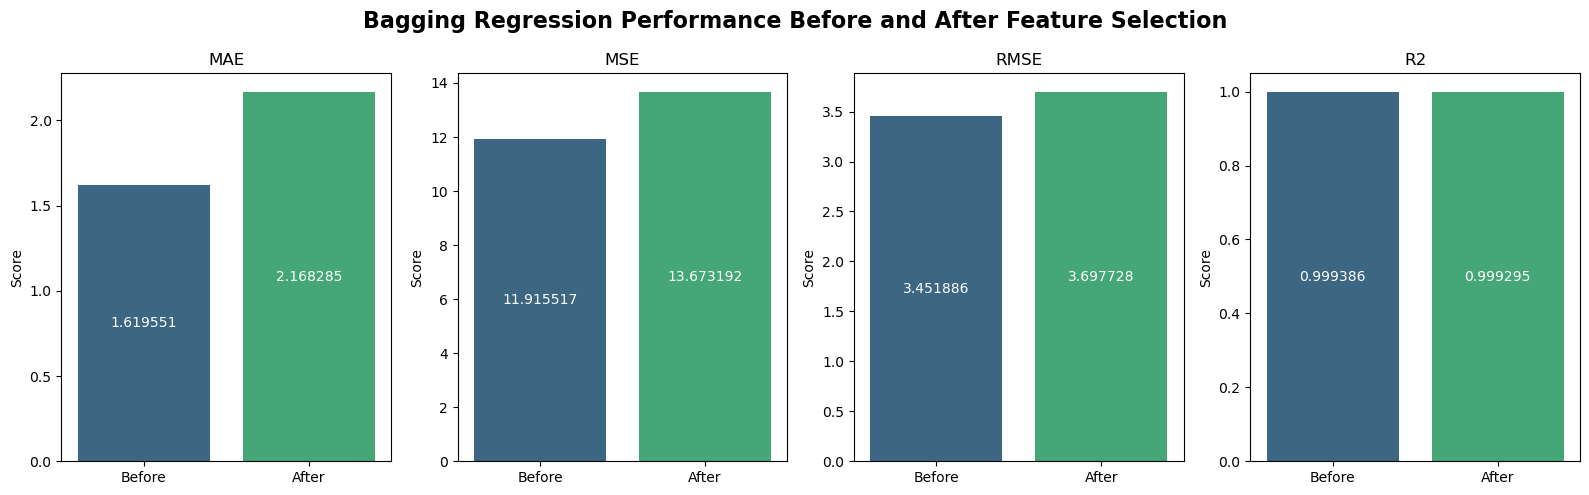

In [122]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        bag_bfs_test_mae,
        bag_bfs_test_mse,
        bag_bfs_test_rmse,
        bag_bfs_test_r2,
    ],
    "After": [
        bag_afs_test_mae,
        bag_afs_test_mse,
        bag_afs_test_rmse,
        bag_afs_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("Bagging Regression Performance Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

### Hyperparameter tuning with RandomizedSearchCV

In [123]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [10, 50],
    'max_samples': [0.7, 1.0],
    'max_features': [0.7, 1.0],
    'bootstrap': [True, False]
}

bag_base = BaggingRegressor(random_state=24)
bag_bfs_rscv = RandomizedSearchCV(
    bag_base,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=10,
    random_state=24,
)
bag_bfs_rscv.fit(X_train_bfs, y_train_bfs)
bag_bfs_best_model = bag_bfs_rscv.best_estimator_

y_pred = bag_bfs_best_model.predict(X_test_bfs)
y_train_pred = bag_bfs_best_model.predict(X_train_bfs)

bag_bfs_best_model_train_mae = mean_absolute_error(y_train_bfs, y_train_pred)
bag_bfs_best_model_test_mae = mean_absolute_error(y_test_bfs, y_pred)
bag_bfs_best_model_train_mse = mean_squared_error(y_train_bfs, y_train_pred)
bag_bfs_best_model_test_mse = mean_squared_error(y_test_bfs, y_pred)
bag_bfs_best_model_train_rmse = root_mean_squared_error(y_train_bfs, y_train_pred)
bag_bfs_best_model_test_rmse = root_mean_squared_error(y_test_bfs, y_pred)
bag_bfs_best_model_train_r2 = r2_score(y_train_bfs, y_train_pred)
bag_bfs_best_model_test_r2 = r2_score(y_test_bfs, y_pred)

print("Best Hyperparameters: ", bag_bfs_rscv.best_params_)
print("Bagging Regressor (HyperParameter Tuned best model) - Before Feature Selection")
print("Train MAE: ", bag_bfs_best_model_train_mae)
print("Test MAE: ", bag_bfs_best_model_test_mae)
print("Train MSE: ", bag_bfs_best_model_train_mse)
print("Test MSE: ", bag_bfs_best_model_test_mse)
print("Train RMSE: ", bag_bfs_best_model_train_rmse)
print("Test RMSE: ", bag_bfs_best_model_test_rmse)
print("Train R2: ", bag_bfs_best_model_train_r2)
print("Test R2: ", bag_bfs_best_model_test_r2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'n_estimators': 50, 'max_samples': 0.7, 'max_features': 1.0, 'bootstrap': False}
Bagging Regressor (HyperParameter Tuned best model) - Before Feature Selection
Train MAE:  0.45717784172661874
Test MAE:  1.5352506474820147
Train MSE:  0.8891027971223013
Test MSE:  9.072429697841724
Train RMSE:  0.9429224767298218
Test RMSE:  3.012047426227171
Train R2:  0.999952100198994
Test R2:  0.9995323091285604


In [124]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [10, 50],
    'max_samples': [0.7, 1.0],
    'max_features': [0.7, 1.0],
    'bootstrap': [True, False]
}

bag_base = BaggingRegressor(random_state=24)
bag_afs_rscv = RandomizedSearchCV(
    bag_base,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=10,
    random_state=24,
)
bag_afs_rscv.fit(X_train_afs, y_train_afs)
bag_afs_best_model = bag_afs_rscv.best_estimator_

y_pred = bag_afs_best_model.predict(X_test_afs)
y_train_pred = bag_afs_best_model.predict(X_train_afs)

bag_afs_best_model_train_mae = mean_absolute_error(y_train_afs, y_train_pred)
bag_afs_best_model_test_mae = mean_absolute_error(y_test_afs, y_pred)
bag_afs_best_model_train_mse = mean_squared_error(y_train_afs, y_train_pred)
bag_afs_best_model_test_mse = mean_squared_error(y_test_afs, y_pred)
bag_afs_best_model_train_rmse = root_mean_squared_error(y_train_afs, y_train_pred)
bag_afs_best_model_test_rmse = root_mean_squared_error(y_test_afs, y_pred)
bag_afs_best_model_train_r2 = r2_score(y_train_afs, y_train_pred)
bag_afs_best_model_test_r2 = r2_score(y_test_afs, y_pred)

print("Best Hyperparameters: ", bag_afs_rscv.best_params_)
print("Bagging Regressor (HyperParameter Tuned best model) - Before Feature Selection")
print("Train MAE: ", bag_afs_best_model_train_mae)
print("Test MAE: ", bag_afs_best_model_test_mae)
print("Train MSE: ", bag_afs_best_model_train_mse)
print("Test MSE: ", bag_afs_best_model_test_mse)
print("Train RMSE: ", bag_afs_best_model_train_rmse)
print("Test RMSE: ", bag_afs_best_model_test_rmse)
print("Train R2: ", bag_afs_best_model_train_r2)
print("Test R2: ", bag_afs_best_model_test_r2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:  {'n_estimators': 50, 'max_samples': 0.7, 'max_features': 1.0, 'bootstrap': False}
Bagging Regressor (HyperParameter Tuned best model) - Before Feature Selection
Train MAE:  0.6325241726618707
Test MAE:  2.104973237410072
Train MSE:  1.1699419812949652
Test MSE:  11.914870992805765
Train RMSE:  1.0816385631508176
Test RMSE:  3.4517924318831463
Train R2:  0.9999369701813177
Test R2:  0.9993857790489088


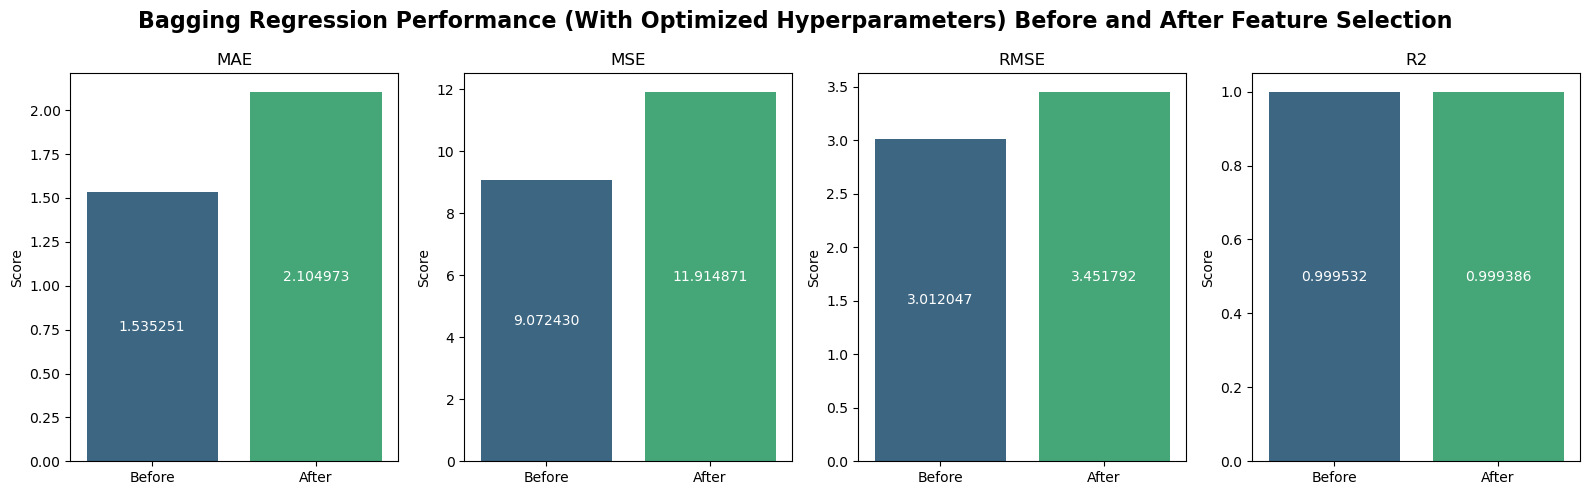

In [125]:
# Score Comparison Plotting
import warnings


data = {
    "Metric": ["MAE", "MSE", "RMSE", "R2"],
    "Before": [
        bag_bfs_best_model_test_mae,
        bag_bfs_best_model_test_mse,
        bag_bfs_best_model_test_rmse,
        bag_bfs_best_model_test_r2,
    ],
    "After": [
        bag_afs_best_model_test_mae,
        bag_afs_best_model_test_mse,
        bag_afs_best_model_test_rmse,
        bag_afs_best_model_test_r2,
    ],
}
df_scores = pd.DataFrame(data)
df_scores.set_index("Metric", inplace=True)
df_melted = df_scores.reset_index().melt(
    id_vars="Metric", var_name="Feature Selection", value_name="Score"
)
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1, 4, figsize=(16, 5), sharey=False)
for ax, metric in zip(axes, df_melted["Metric"]):
    sub = df_melted[df_melted["Metric"] == metric]
    barplot = sns.barplot(data=sub, x="Feature Selection", y="Score", palette="viridis", ax=ax)
    for container in barplot.containers:
        barplot.bar_label(container, fmt="%.6f", label_type="center", fontsize=10, color="white")
    ax.set_title(metric)
    ax.set_xlabel("")
    ax.set_ylabel("Score")

plt.suptitle("Bagging Regression Performance (With Optimized Hyperparameters) Before and After Feature Selection", fontsize=16, fontweight="bold")
plt.tight_layout()
plt.show()

# Model Comparison

In [126]:
# Comparing all models (after feature selection with optimized hyperparameters)
model_names = ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'Stacking', 'Bagging']
test_r2_scores = [
    lr_afs_test_r2,  
    knn_afs_best_model_test_r2, 
    dt_afs_best_model_test_r2,  
    rf_afs_best_model_test_r2, 
    gb_afs_best_model_test_r2,  
    ab_afs_best_model_test_r2,
    stack_bfs_test_r2,
    bag_bfs_best_model_test_r2
]

test_mse_scores = [
    lr_afs_test_mse, 
    knn_afs_best_model_test_mse,  
    dt_afs_best_model_test_mse, 
    rf_afs_best_model_test_mse,  
    gb_afs_best_model_test_mse,  
    ab_afs_best_model_test_mse,  
    stack_bfs_test_mse,
    bag_bfs_best_model_test_mse
]

test_rmse_scores = [
    lr_afs_test_rmse, 
    knn_afs_best_model_test_rmse,  
    dt_afs_best_model_test_rmse, 
    rf_afs_best_model_test_rmse,  
    gb_afs_best_model_test_rmse,  
    ab_afs_best_model_test_rmse,  
    stack_bfs_test_rmse,
    bag_bfs_best_model_test_rmse
]

test_mae_scores = [
    lr_afs_test_mae, 
    knn_afs_best_model_test_mae,  
    dt_afs_best_model_test_mae, 
    rf_afs_best_model_test_mae,  
    gb_afs_best_model_test_mae,  
    ab_afs_best_model_test_mae,  
    stack_bfs_test_mae,
    bag_bfs_best_model_test_mae
]


model_comparison = pd.DataFrame({
    'Model': model_names,
    'R2 Score': test_r2_scores,
    'MAE': test_mae_scores,
    'MSE': test_mse_scores,
    'RMSE': test_rmse_scores
})

model_comparison = model_comparison.sort_values('R2 Score', ascending=False).reset_index(drop=True)

# Print the results
print("Model Performance Comparison (After Feature Selection with Optimized Hyperparameters):")
print(model_comparison)

Model Performance Comparison (After Feature Selection with Optimized Hyperparameters):
               Model  R2 Score        MAE         MSE       RMSE
0            Bagging  0.999532   1.535251    9.072430   3.012047
1  Gradient Boosting  0.999457   2.321222   10.542126   3.246864
2           Stacking  0.999300   2.167566   13.577444   3.684758
3      Decision Tree  0.999080   2.420000   17.855823   4.225615
4      Random Forest  0.998998   2.800551   19.429292   4.407867
5  Linear Regression  0.995269   6.890008   91.768271   9.579576
6                KNN  0.990563   6.009776  183.058964  13.529928
7           AdaBoost  0.976944  14.764341  447.255506  21.148416


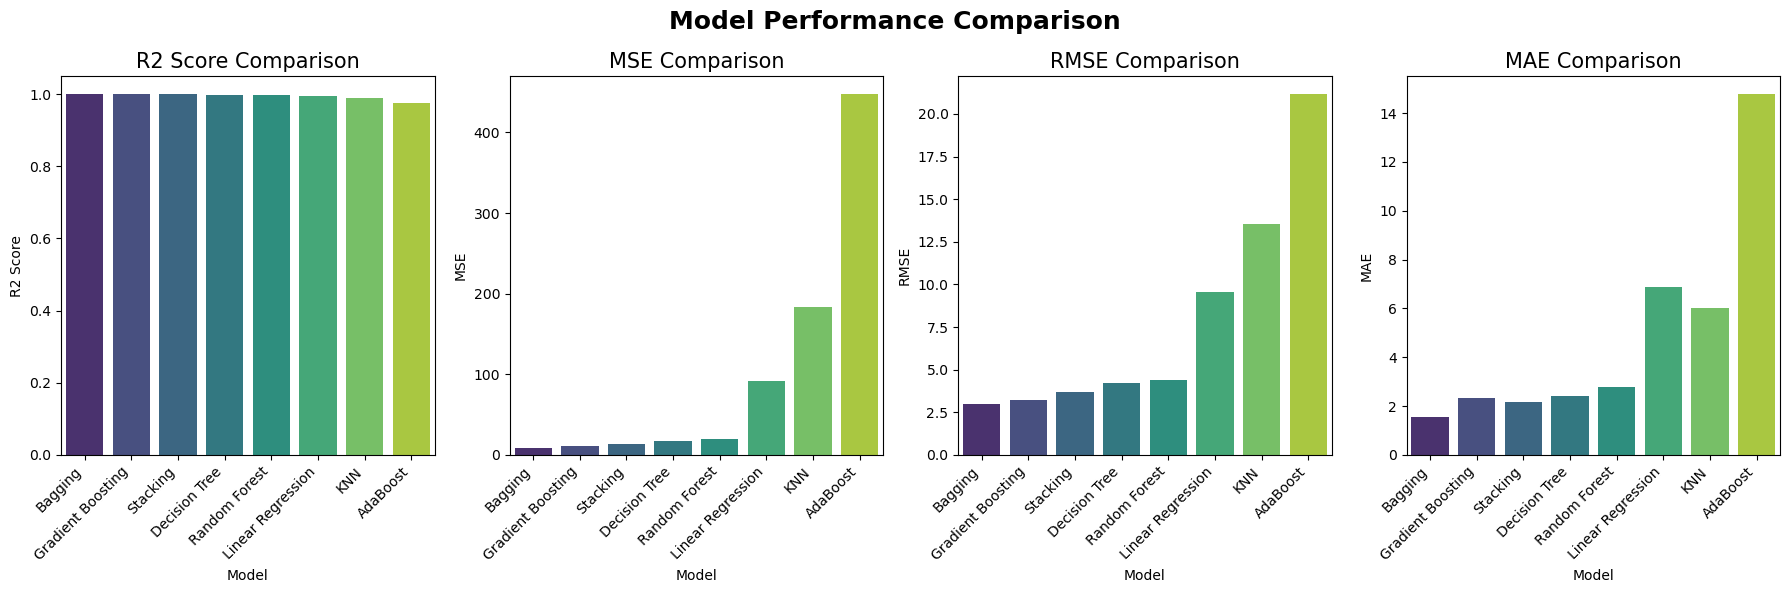

In [135]:
# Plotting model comparison
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# R2 Score plot
sns.barplot(data=model_comparison, x='Model', y='R2 Score', palette='viridis', ax=axes[0])
axes[0].set_title('R2 Score Comparison', fontsize=15)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# MSE plot
sns.barplot(data=model_comparison, x='Model', y='MSE', palette='viridis', ax=axes[1])
axes[1].set_title('MSE Comparison', fontsize=15)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


# RMSE plot
sns.barplot(data=model_comparison, x='Model', y='RMSE', palette='viridis', ax=axes[2])
axes[2].set_title('RMSE Comparison', fontsize=15)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

# MAE plot
sns.barplot(data=model_comparison, x='Model', y='MAE', palette='viridis', ax=axes[3])
axes[3].set_title('MAE Comparison', fontsize=15)
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, ha='right')




plt.suptitle('Model Performance Comparison', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

### Best model: Bagging Regressor

# Applying LIME XAI to the best model

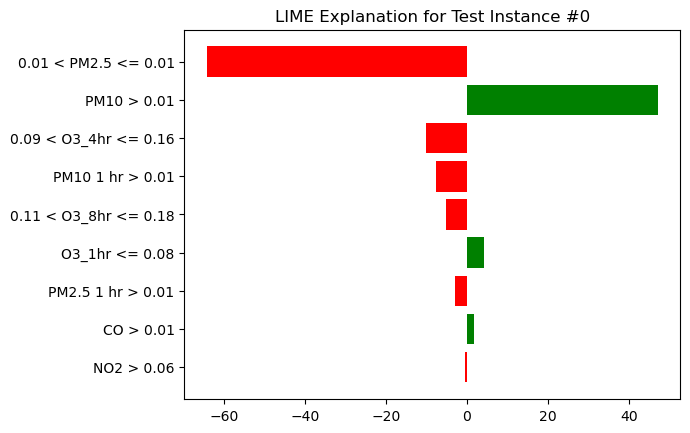

In [141]:
import lime
from lime import lime_tabular
import numpy as np

i = 0
explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train_afs),feature_names=X_train_afs.columns.tolist(),  mode='regression')
exp = explainer.explain_instance(data_row=X_test_afs.iloc[0],predict_fn=bag_afs_best_model.predict)
exp.show_in_notebook(show_table=True)
fig = exp.as_pyplot_figure()
plt.title(f'LIME Explanation for Test Instance #{i}')
plt.show()
